<a href="https://www.kaggle.com/code/kalilurrahman/nvidia-stock-analysis-eda-forecast?scriptVersionId=194466710" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
%matplotlib inline
from IPython.core.display import display, HTML, Javascript

html_contents ="""
<!DOCTYPE html>
<html lang="en">
    <head>
        <link rel="stylesheet" href="https://www.w3schools.com/w3css/4/w3.css">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Raleway">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Roboto">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Verdana">
        <link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Open Sans">
        <link rel="stylesheet" href="https://cdnjs.cloudflare.com/ajax/libs/font-awesome/4.7.0/css/font-awesome.min.css">
        <style>
        .title-section{
            font-family: "Roboto", Verdana, sans-serif;
            font-weight: bold;
            color: "#6A8CAF";
            letter-spacing: 6px;
        }
        hr { border: 1px solid #E58F65 !important;
             color: #E58F65 !important;
             background: #E58F65 !important;
           }
        body {
            font-family: "Verdana", sans-serif;
            }        
        </style>
    </head>    
</html>
"""

HTML(html_contents)

<span class="title-section w3-xxlarge" style="color:magenta" id="codebook">Note:</span>
<div class="alert alert-block alert-warning">Disclaimer: This kernel/notebook is only for academic/educational purposes and understanding of various tools available. Please it for informational purposes only. This is not a qualified guide for any decision making </div>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nvidia-stock-data-latest-and-updated/NVidia_stock_info.csv
/kaggle/input/nvidia-stock-data-latest-and-updated/NVidia_stock_history.csv


# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">0.Introduction </span>

## NVidia - A Company Info from [Wikipedia](https://en.wikipedia.org/wiki/Nvidia) 

![NVidia](https://upload.wikimedia.org/wikipedia/en/thumb/a/a4/NVIDIA_logo.svg/731px-NVIDIA_logo.svg.png)

> - Nvidia Corporation is an American multinational technology company incorporated in Delaware and based in Santa Clara, California.

> - It designs graphics processing units (GPUs) for the gaming and professional markets, as well as system on a chip units (SoCs) for the mobile computing and automotive market. 

> - Its primary GPU line, labeled "GeForce", is in direct competition with the GPUs of the "Radeon" brand by Advanced Micro Devices (AMD). Nvidia expanded its presence in the gaming industry with its handheld game consoles Shield Portable, Shield Tablet, and Shield Android TV and its cloud gaming service GeForce Now. 

> - Its professional line of GPUs are used in workstations for applications in such fields as architecture, engineering and construction, media and entertainment, automotive, scientific research, and manufacturing design.

> - In addition to GPU manufacturing, Nvidia provides an application programming interface (API) called CUDA that allows the creation of massively parallel programs which utilize GPUs.They are deployed in supercomputing sites around the world. More recently, it has moved into the mobile computing market, where it produces Tegra mobile processors for smartphones and tablets as well as vehicle navigation and entertainment systems.It recently acquired ARM

***# Let us analyze the performance of this solid star!***
## Let us analyze and visualize

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">1. Import Libraries</span>

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
   
# For time stamps
from datetime import datetime
from math import sqrt
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">2. Load Dataset</span>

In [4]:
NVDA_Data = pd.read_csv('../input/nvidia-stock-data-latest-and-updated/NVidia_stock_history.csv')

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">3. Simple EDA of Stock Price Movement </span>

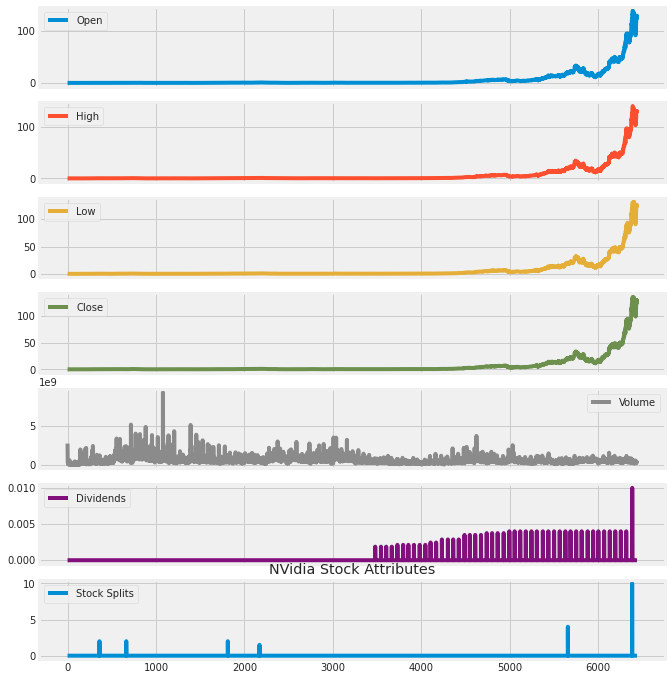

In [5]:
NVDA_Data.plot(subplots = True, figsize = (10,12))
plt.title('NVidia Stock Attributes')
plt.show()

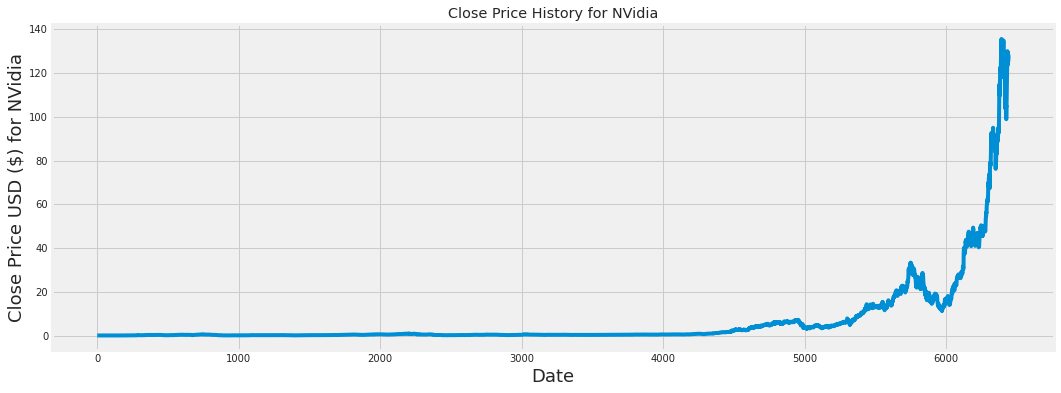

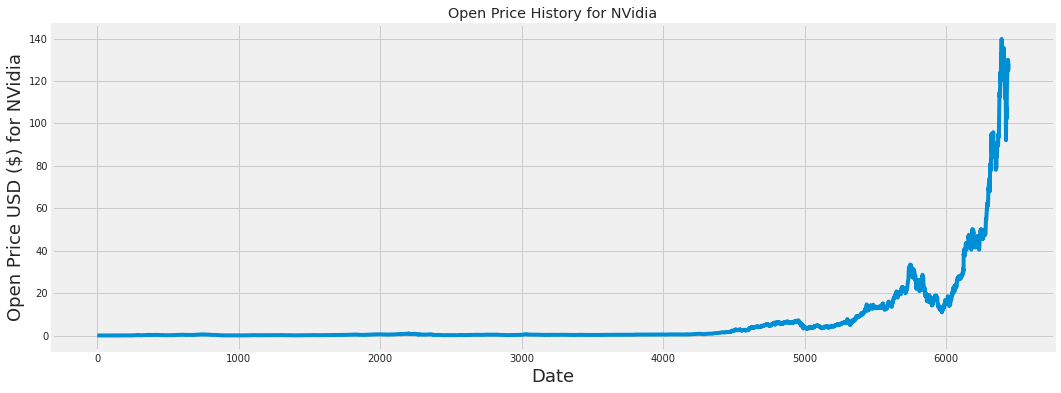

In [6]:
def plot_close_val(data_frame, column, stock):
    plt.figure(figsize=(16,6))
    plt.title(column + ' Price History for ' + stock )
    plt.plot(data_frame[column])
    plt.xlabel('Date', fontsize=18)
    plt.ylabel(column + ' Price USD ($) for ' + stock, fontsize=18)
    plt.show()

#Test the function
plot_close_val(NVDA_Data, 'Close', 'NVidia')
plot_close_val(NVDA_Data, 'Open',  'NVidia')

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook"> 4. Basic Company Info </span>

In [7]:

NVDA_info =  pd.read_csv('../input/nvidia-stock-data-latest-and-updated/NVidia_stock_info.csv')
NVDA_info.drop(NVDA_info.loc[NVDA_info['Value']=='nan'].index, inplace=True)
NVDA = NVDA_info.sort_values('Value').style
NVDA

<AxesSubplot:>

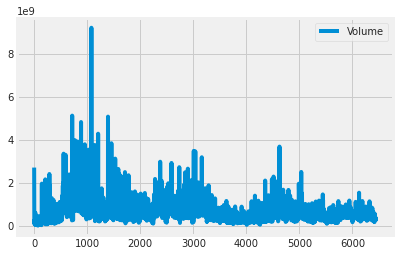

In [8]:
NVDA_Data[["Volume"]].plot()

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">5. Basic CAGR </span>

In [9]:
NVDA_Data = pd.read_csv('../input/nvidia-stock-data-latest-and-updated/NVidia_stock_history.csv', header=0, index_col= 0, names=['Date','Open', 'High', 'Low', 'Close', 'Volume', 'Dividends', 'Splits'], parse_dates=True)
# Get the number of days in `ma`
days = (NVDA_Data.index[-1] - NVDA_Data.index[0]).days

# Calculate the CAGR 
cagr = ((((NVDA_Data['Close'][-1]) / NVDA_Data['Close'][1])) ** (365.0/days)) - 1


# Print CAGR
print("The CAGR (Compound Annual Growth Rate) of NVidia since IPO is " , round((cagr*100),2), "% per year")

The CAGR (Compound Annual Growth Rate) of NVidia since IPO is  36.72 % per year


## 5.1 Basic Rolling Averages

In [10]:
# Isolate the adjusted closing prices 
adj_close_px = NVDA_Data['Close']

# Calculate the moving average
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
moving_avg[-10:]

Date
2024-08-15 00:00:00-04:00    118.836750
2024-08-16 00:00:00-04:00    118.681750
2024-08-19 00:00:00-04:00    118.767500
2024-08-20 00:00:00-04:00    118.996000
2024-08-21 00:00:00-04:00    119.056250
2024-08-22 00:00:00-04:00    118.989750
2024-08-23 00:00:00-04:00    119.124250
2024-08-26 00:00:00-04:00    119.197250
2024-08-27 00:00:00-04:00    119.297250
2024-08-28 00:00:00-04:00    119.359875
Name: Close, dtype: float64

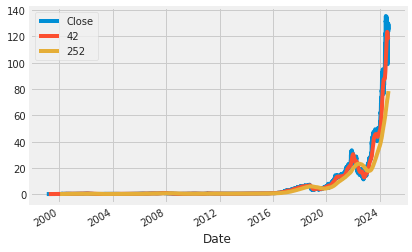

In [11]:
# Short moving window rolling mean
NVDA_Data['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean
NVDA_Data['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
NVDA_Data[['Close', '42', '252']].plot()

plt.show()

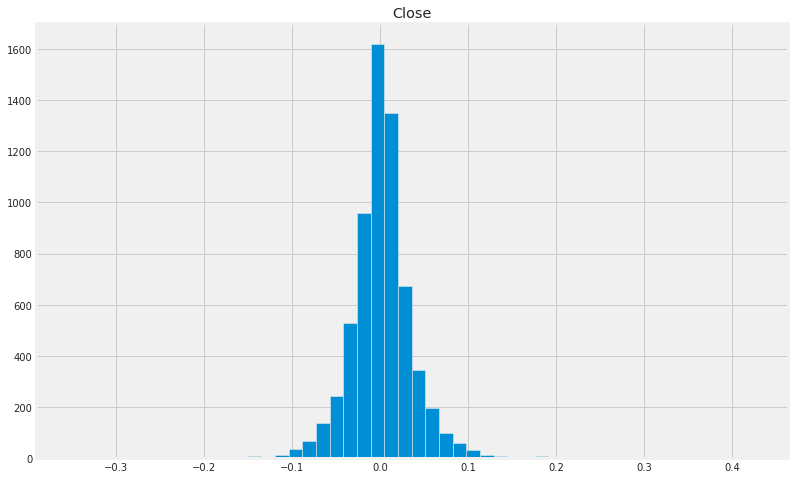

In [12]:
daily_close_px = NVDA_Data[['Close']]
# Calculate the daily percentage change for `daily_close_px`
daily_pct_change = daily_close_px.pct_change()

# Plot the distributions
daily_pct_change.hist(bins=50, sharex=True, figsize=(12,8))

# Show the resulting plot
plt.show()

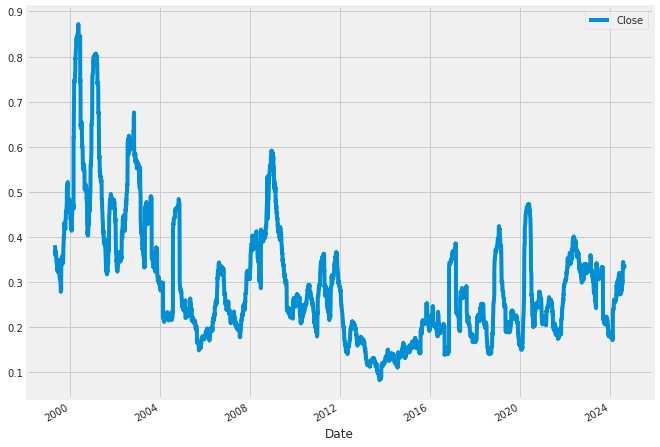

In [13]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_change.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

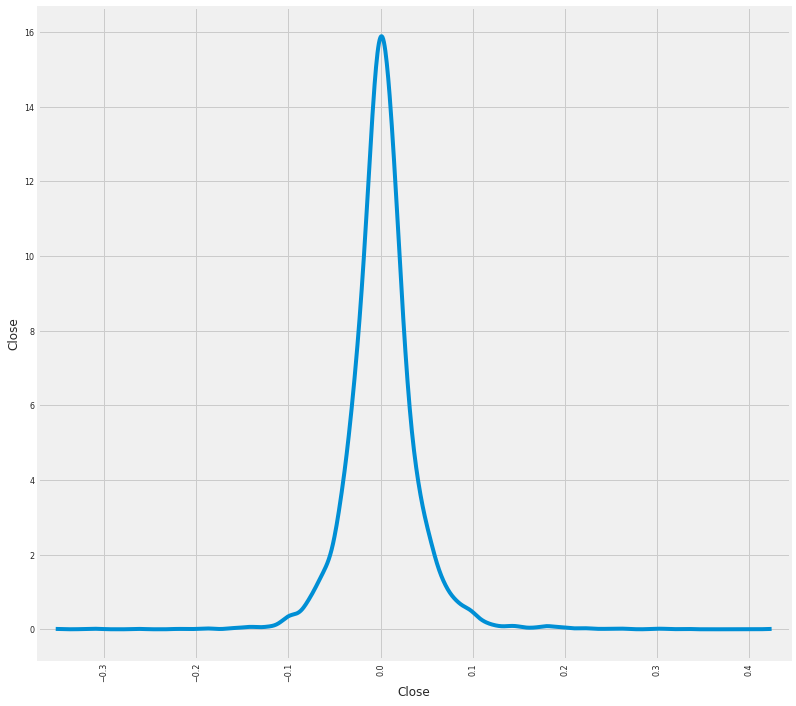

In [14]:
# Plot a scatter matrix with the `daily_pct_change` data 
pd.plotting.scatter_matrix(daily_pct_change, diagonal='kde', alpha=0.1,figsize=(12,12))

# Show the plot
plt.show()

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">5.2 Basic MACD Analysis </span>

In [15]:
import plotly.graph_objects as go

NVDA_Data=NVDA_Data.reset_index()

fig = go.Figure(data=go.Ohlc(x=NVDA_Data['Date'],
        open=NVDA_Data['Open'],
        high=NVDA_Data['High'],
        low=NVDA_Data['Low'],
        close=NVDA_Data['Close']))
fig.show()

In [16]:
NVDA_Data=NVDA_Data.reset_index()

NVDA_Data['SMA5'] = NVDA_Data.Close.rolling(5).mean()
NVDA_Data['SMA20'] = NVDA_Data.Close.rolling(20).mean()
NVDA_Data['SMA50'] = NVDA_Data.Close.rolling(50).mean()
NVDA_Data['SMA200'] = NVDA_Data.Close.rolling(200).mean()
NVDA_Data['SMA500'] = NVDA_Data.Close.rolling(500).mean()

fig = go.Figure(data=[go.Ohlc(x=NVDA_Data['Date'],open=NVDA_Data['Open'],high=NVDA_Data['High'],low=NVDA_Data['Low'],close=NVDA_Data['Close'], name = "OHLC"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA5, line=dict(color='orange', width=1), name="SMA5"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA20, line=dict(color='green', width=1), name="SMA20"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA50, line=dict(color='blue', width=1), name="SMA50"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA200, line=dict(color='violet', width=1), name="SMA200"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA500, line=dict(color='purple', width=1), name="SMA500")])
fig.show()

In [17]:
NVDA_Data['EMA5'] = NVDA_Data.Close.ewm(span=5, adjust=False).mean()
NVDA_Data['EMA20'] = NVDA_Data.Close.ewm(span=20, adjust=False).mean()
NVDA_Data['EMA50'] = NVDA_Data.Close.ewm(span=50, adjust=False).mean()
NVDA_Data['EMA200'] = NVDA_Data.Close.ewm(span=200, adjust=False).mean()
NVDA_Data['EMA500'] = NVDA_Data.Close.ewm(span=500, adjust=False).mean()

fig = go.Figure(data=[go.Ohlc(x=NVDA_Data['Date'],
                              open=NVDA_Data['Open'],
                              high=NVDA_Data['High'],
                              low=NVDA_Data['Low'],
                              close=NVDA_Data['Close'], name = "OHLC"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA5, line=dict(color='orange', width=1), name="EMA5"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA20, line=dict(color='green', width=1), name="EMA20"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA50, line=dict(color='blue', width=1), name="EMA50"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA200, line=dict(color='violet', width=1), name="EMA200"),
                      go.Scatter(x=NVDA_Data.Date, y=NVDA_Data.SMA500, line=dict(color='purple', width=1), name="EMA500")])
fig.show()

In [18]:
NVDA_Data.set_index('Date')

index        Open        High         Low  \
Date                                                                   
1999-01-22 00:00:00-05:00      0    0.040129    0.044786    0.035590   
1999-01-25 00:00:00-05:00      1    0.040607    0.042039    0.037621   
1999-01-26 00:00:00-05:00      2    0.042039    0.042876    0.037740   
1999-01-27 00:00:00-05:00      3    0.038457    0.039412    0.036307   
1999-01-28 00:00:00-05:00      4    0.038218    0.038457    0.037859   
...                          ...         ...         ...         ...   
2024-08-22 00:00:00-04:00   6437  130.020004  130.750000  123.099998   
2024-08-23 00:00:00-04:00   6438  125.860001  129.600006  125.220001   
2024-08-26 00:00:00-04:00   6439  129.570007  131.259995  124.370003   
2024-08-27 00:00:00-04:00   6440  125.050003  129.199997  123.879997   
2024-08-28 00:00:00-04:00   6441  128.119995  128.330002  122.639999   

                                Close      Volume  Dividends  Splits  \
Date                                                                   
1999-01-22 00:00:00-05:00    0.037621  2714688000        0.0     0.0   
1999-01-25 00:00:00-05:00    0.041562   510480000        0.0     0.0   
1999-01-26 00:00:00-05:00    0.038337   343200000        0.0     0.0   
1999-01-27 00:00:00-05:00    0.038218   244368000        0.0     0.0   
1999-01-28 00:00:00-05:00    0.038098   227520000        0.0     0.0   
...                               ...         ...        ...     ...   
2024-08-22 00:00:00-04:00  123.739998   376189100        0.0     0.0   
2024-08-23 00:00:00-04:00  129.369995   323230300        0.0     0.0   
2024-08-26 00:00:00-04:00  126.459999   331964700        0.0     0.0   
2024-08-27 00:00:00-04:00  128.300003   301726100        0.0     0.0   
2024-08-28 00:00:00-04:00  125.175003   241795982        0.0     0.0   

                                   42        252        SMA5       SMA20  \
Date                                                                       
1999-01-22 00:00:00-05:00         NaN        NaN         NaN         NaN   
1999-01-25 00:00:00-05:00         NaN        NaN         NaN         NaN   
1999-01-26 00:00:00-05:00         NaN        NaN         NaN         NaN   
1999-01-27 00:00:00-05:00         NaN        NaN         NaN         NaN   
1999-01-28 00:00:00-05:00         NaN        NaN    0.038767         NaN   
...                               ...        ...         ...         ...   
2024-08-22 00:00:00-04:00  118.989750  77.149653  126.814000  113.768999   
2024-08-23 00:00:00-04:00  119.124250  77.476113  127.771999  114.584499   
2024-08-26 00:00:00-04:00  119.197250  77.790840  127.063998  115.327999   
2024-08-27 00:00:00-04:00  119.297250  78.117410  127.273999  116.556499   
2024-08-28 00:00:00-04:00  119.359875  78.428339  126.609000  116.964250   

                              SMA50     SMA200     SMA500        EMA5  \
Date                                                                    
1999-01-22 00:00:00-05:00       NaN        NaN        NaN    0.037621   
1999-01-25 00:00:00-05:00       NaN        NaN        NaN    0.038935   
1999-01-26 00:00:00-05:00       NaN        NaN        NaN    0.038736   
1999-01-27 00:00:00-05:00       NaN        NaN        NaN    0.038563   
1999-01-28 00:00:00-05:00       NaN        NaN        NaN    0.038408   
...                             ...        ...        ...         ...   
2024-08-22 00:00:00-04:00  120.8158  85.652093  51.407504  124.942213   
2024-08-23 00:00:00-04:00  120.8992  86.070237  51.633761  126.418140   
2024-08-26 00:00:00-04:00  120.8362  86.472812  51.855115  126.432093   
2024-08-27 00:00:00-04:00  120.7646  86.881493  52.080813  127.054730   
2024-08-28 00:00:00-04:00  120.6485  87.272669  52.301009  126.428154   

                                EMA20       EMA50     EMA200     EMA500  
Date                                                                     
1999-01-22 00:00:00-05:00    0.037621    0.037621   0.037621   0.0

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook"> 6. ARIMA analysis </span>

In [19]:
#NVDA_Data = NVDA_Data.set_index('Date')
NVDA_Data.index
x = NVDA_Data['Open'] #.resample('MS').mean()
x.head()

0    0.040129
1    0.040607
2    0.042039
3    0.038457
4    0.038218
Name: Open, dtype: float64

#visualize time series of open price
x.plot(figsize = (10,6))
plt.title("Opening Price")
plt.show()

In [20]:
from pylab import rcParams
import statsmodels.api as sm


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

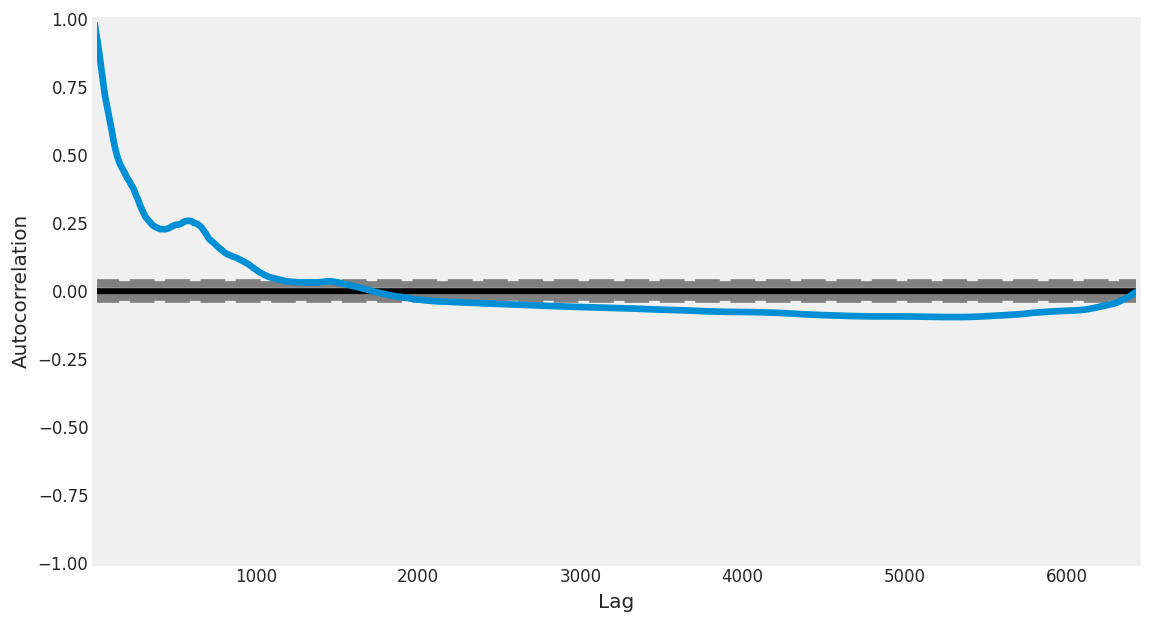

In [21]:
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.stattools import adfuller, kpss
plt.rcParams.update({'figure.figsize':(10,6), 'figure.dpi':120})
autocorrelation_plot(x.tolist())

In [22]:
import warnings
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [23]:
#selection of parameter
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(x, order = param, seasonal_order = param_seasonal, enforce_stationarity = False,
                                            enforce_invertibility = False)
            results = model.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
                continue

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.33604D+00    |proj g|=  8.36220D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   8.362D-06   4.336D+00
  F =   4.3360447105421809     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:55867.600050625464
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variabl

 This problem is unconstrained.



At iterate    5    f=  3.97764D+00    |proj g|=  5.67509D-02

At iterate   10    f=  3.76467D+00    |proj g|=  1.49169D-01

At iterate   15    f=  3.72602D+00    |proj g|=  6.39010D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     49      1     0     0   2.083D-05   3.726D+00
  F =   3.7258531897749028     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:48007.892497059845
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.22102D+00    |proj g|=  8.99722D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      2      4      1     0     0   4.979D-07   2.221D+00
  F =   2.2210182034162802     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


 This problem is unconstrained.


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:28617.598532815355
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10



 This problem is unconstrained.


At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21431D+00    |proj g|=  1.06765D-01

At iterate    5    f=  2.20817D+00    |proj g|=  2.14131D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   2.141D-06   2.208D+00
  F =   2.2081655654726333     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:28454.00514554941
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     18      1     0     0   3.432D-04   2.174D+00
  F =   2.1742248710188585     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:28016.713238206972
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.17712D+00    |proj g|=  7.65622D-02


 This problem is unconstrained.



At iterate    5    f=  2.17277D+00    |proj g|=  3.19061D-03

At iterate   10    f=  2.17275D+00    |proj g|=  1.87834D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   9.278D-06   2.173D+00
  F =   2.1727547573200505     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:27999.77229331153
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.20733D+00    |proj g|=  4.34994D-06

           * *

 This problem is unconstrained.


ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:28443.26855608092
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.21341D+00    |proj g|=  1.06105D-01


 This problem is unconstrained.



At iterate    5    f=  2.20714D+00    |proj g|=  4.90752D-03

At iterate   10    f=  2.20706D+00    |proj g|=  3.90594D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     12      1     0     0   3.906D-06   2.207D+00
  F =   2.2070554598614600     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:28441.702544855052
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.98967D+00    |proj g|=  1.66703D-01


 This problem is unconstrained.



At iterate    5    f=  3.96308D+00    |proj g|=  3.98548D-02

At iterate   10    f=  3.70345D+00    |proj g|=  2.21951D-01

At iterate   15    f=  3.66932D+00    |proj g|=  5.08090D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     19     33      1     0     0   9.493D-05   3.669D+00
  F =   3.6692875160839389     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:47279.10035722547
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  3.84924D+00    |proj g|=  2.76288D-01

At iterate   10    f=  3.24950D+00    |proj g|=  5.51371D-01

At iterate   15    f=  3.08667D+00    |proj g|=  2.18242D-01

At iterate   20    f=  3.08507D+00    |proj g|=  3.27397D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     21     44      1     0     0   6.519D-06   3.085D+00
  F =   3.0850707898675656     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:39754.052056653716
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  1.77966D+00    |proj g|=  6.30473D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     11      1     0     0   5.093D-06   1.780D+00
  F =   1.7796462277047052     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:22932.96199774742
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89946D+00    |proj g|=  2.41117D-01


 This problem is unconstrained.



At iterate    5    f=  1.77693D+00    |proj g|=  4.98535D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   2.068D-06   1.777D+00
  F =   1.7769150576653669     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:22899.773602960588
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83233D+00    |proj g|=  5.36546D-02


 This problem is unconstrained.



At iterate    5    f=  1.83788D+00    |proj g|=  6.61925D-01

At iterate   10    f=  1.74754D+00    |proj g|=  4.65576D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     29      1     0     0   3.184D-06   1.748D+00
  F =   1.7475376430979437     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:22521.274993673906
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83112D+00    |proj g|=  5.36393D-02


 This problem is unconstrained.



At iterate    5    f=  1.88691D+00    |proj g|=  2.68779D+00

At iterate   10    f=  1.74478D+00    |proj g|=  1.68726D-02

At iterate   15    f=  1.74462D+00    |proj g|=  1.07262D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     30      1     0     0   5.895D-08   1.745D+00
  F =   1.7446152523990106     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:22485.622911908853
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  1.77741D+00    |proj g|=  5.65772D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   8.354D-07   1.777D+00
  F =   1.7773977061583346     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:22905.992046143983
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.89982D+00    |proj g|=  2.40839D-01


 This problem is unconstrained.



At iterate    5    f=  1.77708D+00    |proj g|=  1.49279D-03

At iterate   10    f=  1.77704D+00    |proj g|=  6.23971D-03

At iterate   15    f=  1.77693D+00    |proj g|=  1.83799D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     22      1     0     0   2.889D-05   1.777D+00
  F =   1.7769349047389487     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:22902.029312656614
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.
 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.94504D-01    |proj g|=  7.93909D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      6      1     0     0   4.179D-07   9.945D-01
  F =  0.99446129154160434     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:12816.63928022203
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variable

 This problem is unconstrained.


ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:16729.595491336033
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10



 This problem is unconstrained.


At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.06847D+00    |proj g|=  2.46502D-01

At iterate    5    f=  9.96629D-01    |proj g|=  4.29663D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      7     10      1     0     0   1.089D-05   9.966D-01
  F =  0.99662923914490609     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:12844.57111714297
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     10      1     0     0   2.318D-05   9.948D-01
  F =  0.99484898190356796     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:12821.634282845569
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.93633D-01    |proj g|=  3.92837D-03


 This problem is unconstrained.



At iterate    5    f=  9.92724D-01    |proj g|=  3.64463D-02

At iterate   10    f=  9.92317D-01    |proj g|=  3.76692D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     14      1     0     0   3.767D-06   9.923D-01
  F =  0.99231728924428630     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:12791.015954623384
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19025D+00    |proj g|=  1.60872D-05


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     10      1     0     0   1.575D-05   1.190D+00
  F =   1.1902523397501905     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:15339.211145341455
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.07555D+00    |proj g|=  2.38217D-01


 This problem is unconstrained.



At iterate    5    f=  9.98481D-01    |proj g|=  1.81081D-01

At iterate   10    f=  9.96611D-01    |proj g|=  1.57860D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     20      1     0     0   1.579D-05   9.966D-01
  F =  0.99661086345653238     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:12846.334364773964
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.94038D-01    |proj g|=  8.83769D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      7      1     0     0   4.348D-07   9.940D-01
  F =  0.99399259633715698     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:12810.60061120793


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.91532D-01    |proj g|=  9.88123D-03

At iterate    5    f=  9.91434D-01    |proj g|=  3.93146D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   5.017D-08   9.914D-01
  F =  0.99143395764550846     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:12779.635110304731
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      7      1     0     0   4.420D-07   1.296D+00
  F =   1.2956459765709558     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:16697.102762140195
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10728D+00    |proj g|=  4.20857D-01


 This problem is unconstrained.



At iterate    5    f=  9.93428D-01    |proj g|=  5.52699D-02

At iterate   10    f=  9.93056D-01    |proj g|=  4.19145D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     21      1     0     0   3.905D-06   9.931D-01
  F =  0.99305286322858966     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:12800.49308983715
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.91902D-01    |proj g|=  7.97222D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4     19      1     0     0   1.352D-05   9.919D-01
  F =  0.99186214755489899     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:12785.151909097318
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.90722D-01    |proj g|=  6.47396D-03


 This problem is unconstrained.



At iterate    5    f=  9.90607D-01    |proj g|=  6.49640D-03

At iterate   10    f=  9.89612D-01    |proj g|=  1.17026D-02

At iterate   15    f=  9.89571D-01    |proj g|=  3.84682D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     19      1     0     0   3.847D-06   9.896D-01
  F =  0.98957137661685235     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:12757.637616331525
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10



 This problem is unconstrained.


At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19761D+00    |proj g|=  2.17574D-01

At iterate    5    f=  1.18651D+00    |proj g|=  2.20584D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   3.565D-06   1.187D+00
  F =   1.1865134130882449     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:15293.038814228947
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  

 This problem is unconstrained.



At iterate    5    f=  9.97155D-01    |proj g|=  7.03533D-02

At iterate   10    f=  9.93121D-01    |proj g|=  3.23933D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     21      1     0     0   2.029D-05   9.931D-01
  F =  0.99311443346664596     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:12803.286360784266
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.93372D-01    |proj g|=  3.97664D-03


 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     15      1     0     0   3.977D-03   9.934D-01
  F =  0.99337203316463685     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:12802.605275293181


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00736D+00    |proj g|=  1.64615D-01

At iterate    5    f=  9.91185D-01    |proj g|=  1.79270D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     13      1     0     0   7.637D-06   9.911D-01
  F =  0.99114390718419931     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:12775.898100161225
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1      7      1     0     0   2.810D-05   1.282D+00
  F =   1.2817975089050992     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:16518.6791047333
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29166D+00    |proj g|=  3.98962D-01


 This problem is unconstrained.



At iterate    5    f=  1.02297D+00    |proj g|=  8.54511D-01

At iterate   10    f=  9.95161D-01    |proj g|=  3.68849D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     32      1     0     0   6.372D-04   9.952D-01
  F =  0.99515383575783189     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:12827.562019903906
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.45290D+00    |proj g|=  1.41197D+00


 This problem is unconstrained.



At iterate    5    f=  1.19490D+00    |proj g|=  5.99148D-01

At iterate   10    f=  1.01088D+00    |proj g|=  5.64562D-01

At iterate   15    f=  9.91399D-01    |proj g|=  1.51140D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     17     25      1     0     0   2.353D-05   9.914D-01
  F =  0.99139885369991165     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:12779.182831069662
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  1.12830D+00    |proj g|=  3.24514D-01

At iterate   10    f=  1.00492D+00    |proj g|=  4.05552D-01

At iterate   15    f=  9.92818D-01    |proj g|=  8.42066D-04

At iterate   20    f=  9.92817D-01    |proj g|=  3.96502D-02

At iterate   25    f=  9.89256D-01    |proj g|=  1.34510D-01

At iterate   30    f=  9.88948D-01    |proj g|=  1.76615D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     47      1     0     0   7.333D-06   9.889D-01
  F =  0.98894752974792222     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:12749.59997327

 This problem is unconstrained.



At iterate    5    f=  1.18016D+00    |proj g|=  3.48100D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   5.801D-06   1.180D+00
  F =   1.1800434619960707     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:15209.679964357374


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29541D+00    |proj g|=  4.24797D-01

At iterate    5    f=  1.06894D+00    |proj g|=  2.00916D-01

At iterate   10    f=  9.96047D-01    |proj g|=  6.35156D-01

At iterate   15    f=  9.95057D-01    |proj g|=  1.93267D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     24      1     0     0   1.392D-06   9.951D-01
  F =  0.99505731884757243     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1,

 This problem is unconstrained.



At iterate    5    f=  9.89039D-01    |proj g|=  7.90229D-02

At iterate   10    f=  9.89034D-01    |proj g|=  5.65984D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     19      1     0     0   3.136D-03   9.890D-01
  F =  0.98903401717207129     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:12748.714277244966


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.00421D+00    |proj g|=  1.70404D-01

At iterate    5    f=  9.87227D-01    |proj g|=  7.38191D-02

At iterate   10    f=  9.87043D-01    |proj g|=  5.92215D-03

At iterate   15    f=  9.87026D-01    |proj g|=  4.05141D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     22      1     0     0   2.473D-05   9.870D-01
  F =  0.98702589892686610     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1,

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      8      1     0     0   1.403D-06   1.281D+00
  F =   1.2813254678926220     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:16514.597328328542
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29124D+00    |proj g|=  4.00602D-01


 This problem is unconstrained.



At iterate    5    f=  1.03666D+00    |proj g|=  2.41004D+00

At iterate   10    f=  9.92043D-01    |proj g|=  1.72054D-01

At iterate   15    f=  9.91140D-01    |proj g|=  3.04742D-01

At iterate   20    f=  9.90947D-01    |proj g|=  3.29767D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     21     34      1     0     0   2.891D-06   9.909D-01
  F =  0.99094691243232025     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:12775.360019778014
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X

 This problem is unconstrained.



At iterate    5    f=  1.19074D+00    |proj g|=  2.99316D-01

At iterate   10    f=  9.90644D-01    |proj g|=  1.60212D-01

At iterate   15    f=  9.87320D-01    |proj g|=  1.23586D-01

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     19     25      1     0     0   1.050D-04   9.873D-01
  F =  0.98730897826760711     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:12728.48887599985
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    

 This problem is unconstrained.



At iterate    5    f=  1.12973D+00    |proj g|=  3.28316D-01

At iterate   10    f=  1.00435D+00    |proj g|=  3.29746D+00

At iterate   15    f=  9.88421D-01    |proj g|=  1.00961D-01

At iterate   20    f=  9.88354D-01    |proj g|=  2.91529D-02

At iterate   25    f=  9.88328D-01    |proj g|=  1.03762D-02
  ys=-2.966E-04  -gs= 3.891E-05 BFGS update SKIPPED

At iterate   30    f=  9.85263D-01    |proj g|=  4.25102D-02

At iterate   35    f=  9.85160D-01    |proj g|=  1.57019D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     38     53      1     1     0   3.754D-05   9.852D-01
  F =  0.98515745429099377     

 This problem is unconstrained.



At iterate    5    f=  1.17860D+00    |proj g|=  2.21348D-02

At iterate   10    f=  1.17818D+00    |proj g|=  3.62793D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   2.356D-05   1.178D+00
  F =   1.1781798408828430     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:15187.669069934549
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29499D+00    |proj g|=  4.26038D-01


 This problem is unconstrained.



At iterate    5    f=  1.06695D+00    |proj g|=  2.11621D-01

At iterate   10    f=  9.93123D-01    |proj g|=  2.92371D-01

At iterate   15    f=  9.90950D-01    |proj g|=  7.28769D-03

At iterate   20    f=  9.90917D-01    |proj g|=  1.71411D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     22     31      1     0     0   7.830D-05   9.909D-01
  F =  0.99091721614684158     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:12776.977412835908
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X

 This problem is unconstrained.

   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     15      1     0     0   2.334D-05   9.946D-01
  F =  0.99458021155801646     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:12818.171445713484
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.92084D-01    |proj g|=  1.00215D-02


 This problem is unconstrained.



At iterate    5    f=  9.92017D-01    |proj g|=  7.74814D-07

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      9      1     0     0   7.748D-07   9.920D-01
  F =  0.99201742726093878     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:12787.152532829936
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29644D+00    |proj g|=  1.29210D-05


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     13      1     0     0   1.276D-05   1.296D+00
  F =   1.2964369833259852     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:16707.294093171993
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10772D+00    |proj g|=  4.20541D-01


 This problem is unconstrained.



At iterate    5    f=  9.93785D-01    |proj g|=  6.51368D-03

At iterate   10    f=  9.93767D-01    |proj g|=  9.39997D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     17      1     0     0   9.400D-06   9.938D-01
  F =  0.99376729006507059     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:12809.697765198369
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.92298D-01    |proj g|=  1.52902D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      7      1     0     0   1.716D-05   9.923D-01
  F =  0.99229549821942220     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:12790.735199059036
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.91270D-01    |proj g|=  6.31814D-03


 This problem is unconstrained.



At iterate    5    f=  9.91154D-01    |proj g|=  1.19606D-02

At iterate   10    f=  9.90123D-01    |proj g|=  8.34942D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   2.334D-05   9.901D-01
  F =  0.99010762783980821     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:12764.546677088088
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19792D+00    |proj g|=  2.16644D-01


 This problem is unconstrained.



At iterate    5    f=  1.18710D+00    |proj g|=  1.13169D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   5.130D-06   1.187D+00
  F =   1.1871002706856204     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:15300.599887513534


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11296D+00    |proj g|=  4.09265D-01

At iterate    5    f=  9.97751D-01    |proj g|=  7.09627D-02

At iterate   10    f=  9.93845D-01    |proj g|=  3.71669D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     21      1     0     0   6.555D-06   9.938D-01
  F =  0.99383809440355619     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:12812.610008295418
RUNNING THE L-

 This problem is unconstrained.



At iterate    5    f=  9.93216D-01    |proj g|=  3.65921D-03

At iterate   10    f=  9.93165D-01    |proj g|=  3.27823D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   8.954D-06   9.932D-01
  F =  0.99316469620879366     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:12801.933945954097
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.90742D-01    |proj g|=  1.32551D-02


 This problem is unconstrained.



At iterate    5    f=  9.90596D-01    |proj g|=  2.00152D-03

At iterate   10    f=  9.90523D-01    |proj g|=  1.20520D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     11     15      1     0     0   2.824D-07   9.905D-01
  F =  0.99052346706121963     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:12769.904349616754
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.29420D+00    |proj g|=  3.04865D-02


 This problem is unconstrained.



At iterate    5    f=  1.29297D+00    |proj g|=  7.65816D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     14      1     0     0   1.229D-06   1.293D+00
  F =   1.2929489211555056     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:16664.353900167534
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.10659D+00    |proj g|=  4.21544D-01


 This problem is unconstrained.



At iterate    5    f=  9.92149D-01    |proj g|=  1.32844D-02

At iterate   10    f=  9.92124D-01    |proj g|=  3.35088D-03

At iterate   15    f=  9.92083D-01    |proj g|=  4.30967D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     25      1     0     0   4.422D-06   9.921D-01
  F =  0.99208177544943743     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:12789.981594890553
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate   

 This problem is unconstrained.



At iterate    5    f=  9.90964D-01    |proj g|=  4.13973D-03

At iterate   10    f=  9.90895D-01    |proj g|=  2.42625D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     13     17      1     0     0   5.721D-06   9.909D-01
  F =  0.99089350891521577     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:12774.67196886364
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.89945D-01    |proj g|=  1.21967D-02


 This problem is unconstrained.



At iterate    5    f=  9.89449D-01    |proj g|=  1.45893D-02

At iterate   10    f=  9.88874D-01    |proj g|=  2.11523D-03

At iterate   15    f=  9.88767D-01    |proj g|=  8.18446D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     16     22      1     0     0   4.461D-06   9.888D-01
  F =  0.98876691727976418     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:12749.272962232482


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19661D+00    |proj g|=  2.18397D-01

At iterate    5    f=  1.18525D+00    |proj g|=  2.19439D-03

At iterate   10    f=  1.18511D+00    |proj g|=  4.89855D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   1.061D-06   1.185D+00
  F =   1.1850896557253625     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:15276.695124365571


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.11184D+00    |proj g|=  4.10196D-01

At iterate    5    f=  9.96678D-01    |proj g|=  8.24677D-02

At iterate   10    f=  9.92156D-01    |proj g|=  1.11327D-03

At iterate   15    f=  9.92123D-01    |proj g|=  1.17746D-02

At iterate   20    f=  9.92104D-01    |proj g|=  6.37576D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     21     27      1     0     0   4.476D-05   9.921D-01
  F =  0.99210437184458389     

CONVERG

In [24]:
#fitting model
model = sm.tsa.statespace.SARIMAX(x, order = (1, 1, 1), seasonal_order = (1, 1, 0, 12), enforce_stationarity = False,
                                enforce_invertibility = False)
result = model.fit()
print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  1.19661D+00    |proj g|=  2.18397D-01


 This problem is unconstrained.



At iterate    5    f=  1.18525D+00    |proj g|=  2.19439D-03

At iterate   10    f=  1.18511D+00    |proj g|=  4.89855D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     18      1     0     0   1.061D-06   1.185D+00
  F =   1.1850896557253625     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2520      0.022     11.222      0.000       0.208       0.296
ma.L1         -0.3431      0.022    -15.511      0.000      -0

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">6.1 AD Fuller Tests</span>

In [25]:
# ADF Test
result = adfuller(x, autolag = 'AIC')
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

# KPSS Test
result = kpss(x, regression = 'c')
print('\nKPSS Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[3].items():
    print('Critial Values:')
    print(f'   {key}, {value}')

ADF Statistic: 8.003102203647009
p-value: 1.0
Critial Values:
   1%, -3.4313710585113126
Critial Values:
   5%, -2.861991219262543
Critial Values:
   10%, -2.567010180806418

KPSS Statistic: 5.966040
p-value: 0.010000
Critial Values:
   10%, 0.347
Critial Values:
   5%, 0.463
Critial Values:
   2.5%, 0.574
Critial Values:
   1%, 0.739


/opt/conda/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:1907: InterpolationWarning:

The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.




# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">7 FINTA Tech Analysis Ratios</span>

## Let us do a financial ratios calculation using FINTA library
* Simple Moving Average 'SMA'
* Simple Moving Median 'SMM'
* Smoothed Simple Moving Average 'SSMA'
* Exponential Moving Average 'EMA'
* Double Exponential Moving Average 'DEMA'
* Triple Exponential Moving Average 'TEMA'
* Triangular Moving Average 'TRIMA'
* Triple Exponential Moving Average Oscillator 'TRIX'
* Volume Adjusted Moving Average 'VAMA'
* Kaufman Efficiency Indicator 'ER'
* Kaufman's Adaptive Moving Average 'KAMA'
* Zero Lag Exponential Moving Average 'ZLEMA'
* Weighted Moving Average 'WMA'
* Hull Moving Average 'HMA'
* Elastic Volume Moving Average 'EVWMA'
* Volume Weighted Average Price 'VWAP'
* Smoothed Moving Average 'SMMA'
* Fractal Adaptive Moving Average 'FRAMA'
* Moving Average Convergence Divergence 'MACD'
* Percentage Price Oscillator 'PPO'
* Volume-Weighted MACD 'VW_MACD'
* Elastic-Volume weighted MACD 'EV_MACD'
* Market Momentum 'MOM'
* Rate-of-Change 'ROC'
* Relative Strenght Index 'RSI'
* Inverse Fisher Transform RSI 'IFT_RSI'
* True Range 'TR'
* Average True Range 'ATR'
* Stop-and-Reverse 'SAR'
* Bollinger Bands 'BBANDS'
* Bollinger Bands Width 'BBWIDTH'
* Momentum Breakout Bands 'MOBO'
* Percent B 'PERCENT_B'
* Keltner Channels 'KC'
* Donchian Channel 'DO'
* Directional Movement Indicator 'DMI'
* Average Directional Index 'ADX'
* Pivot Points 'PIVOT'
* Fibonacci Pivot Points 'PIVOT_FIB'
* Stochastic Oscillator %K 'STOCH'
* Stochastic oscillator %D 'STOCHD'
* Stochastic RSI 'STOCHRSI'
* Williams %R 'WILLIAMS'
* Ultimate Oscillator 'UO'
* Awesome Oscillator 'AO'
* Mass Index 'MI'
* Vortex Indicator 'VORTEX'
* Know Sure Thing 'KST'
* True Strength Index 'TSI'
* Typical Price 'TP'
* Accumulation-Distribution Line 'ADL'
* Chaikin Oscillator 'CHAIKIN'
* Money Flow Index 'MFI'
* On Balance Volume 'OBV'
* Weighter OBV 'WOBV'
* Volume Zone Oscillator 'VZO'
* Price Zone Oscillator 'PZO'
* Elder's Force Index 'EFI'
* Cummulative Force Index 'CFI'
* Bull power and Bear Power 'EBBP'
* Ease of Movement 'EMV'
* Commodity Channel Index 'CCI'
* Coppock Curve 'COPP'
* Buy and Sell Pressure 'BASP'
* Normalized BASP 'BASPN'
* Chande Momentum Oscillator 'CMO'
* Chandelier Exit 'CHANDELIER'
* Qstick 'QSTICK'
* Twiggs Money Index 'TMF'
* Wave Trend Oscillator 'WTO'
* Fisher Transform 'FISH'
* Ichimoku Cloud 'ICHIMOKU'
* Adaptive Price Zone 'APZ'
* Squeeze Momentum Indicator 'SQZMI'
* Volume Price Trend 'VPT'
* Finite Volume Element 'FVE'
* Volume Flow Indicator 'VFI'
* Moving Standard deviation 'MSD'
* Schaff Trend Cycle 'STC'

In [26]:
try:
    from finta import TA
    from backtesting import Backtest, Strategy
    from backtesting.lib import crossover
except:
    !pip install finta backtesting
    from finta import TA
    from backtesting import Backtest, Strategy
    from backtesting.lib import crossover

     |████████████████████████████████| 175 kB 7.4 MB/s 
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173819 sha256=4239dbfda78d096affb18e213cfb2d70fde761497f6c4394a18be86db7df9654
  Stored in directory: /root/.cache/pip/wheels/48/1d/ea/65dacebc37da7655d8a1fd0f315ac39d102e31d6545237a1c6
Successfully built backtesting


Loading BokehJS ...

In [27]:
fin_NVDA = pd.read_csv('../input/nvidia-stock-data-latest-and-updated/NVidia_stock_history.csv', index_col="Date", parse_dates=True)
print(fin_NVDA.head())
ohlc=fin_NVDA
print(TA.SMA(ohlc, 42))

                               Open      High       Low     Close      Volume  \
Date                                                                            
1999-01-22 00:00:00-05:00  0.040129  0.044786  0.035590  0.037621  2714688000   
1999-01-25 00:00:00-05:00  0.040607  0.042039  0.037621  0.041562   510480000   
1999-01-26 00:00:00-05:00  0.042039  0.042876  0.037740  0.038337   343200000   
1999-01-27 00:00:00-05:00  0.038457  0.039412  0.036307  0.038218   244368000   
1999-01-28 00:00:00-05:00  0.038218  0.038457  0.037859  0.038098   227520000   

                           Dividends  Stock Splits  
Date                                                
1999-01-22 00:00:00-05:00        0.0           0.0  
1999-01-25 00:00:00-05:00        0.0           0.0  
1999-01-26 00:00:00-05:00        0.0           0.0  
1999-01-27 00:00:00-05:00        0.0           0.0  
1999-01-28 00:00:00-05:00        0.0           0.0  
Date
1999-01-22 00:00:00-05:00           NaN
1999-01-25 00:00

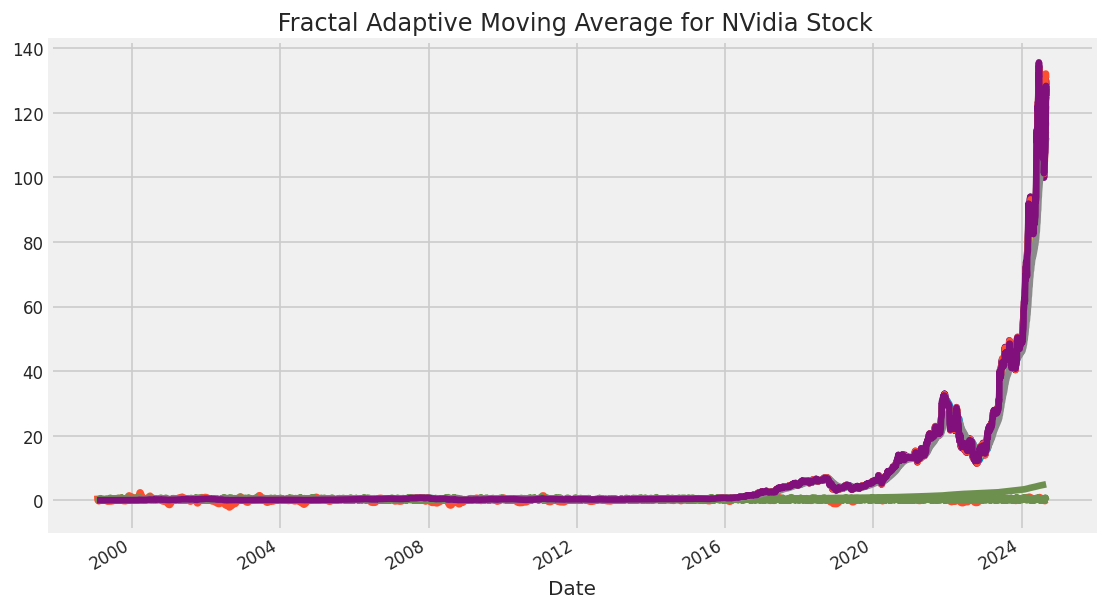

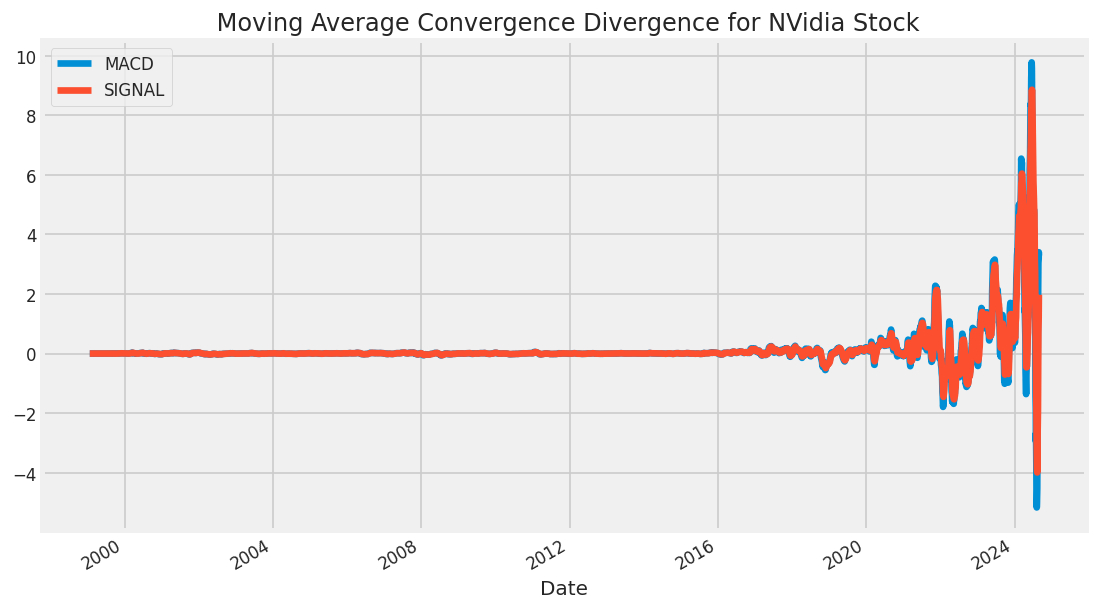

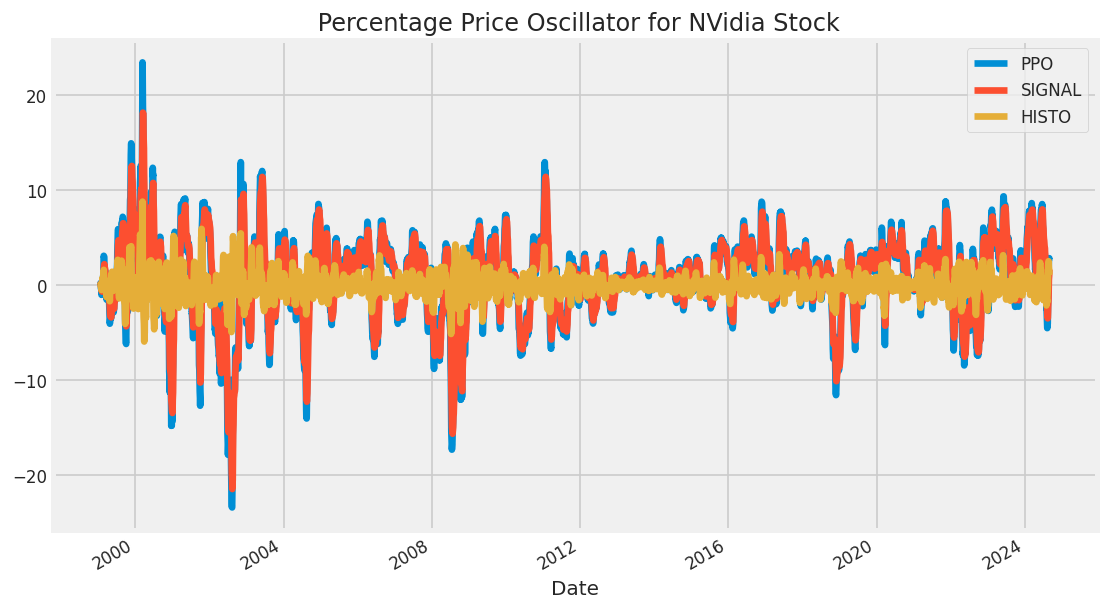

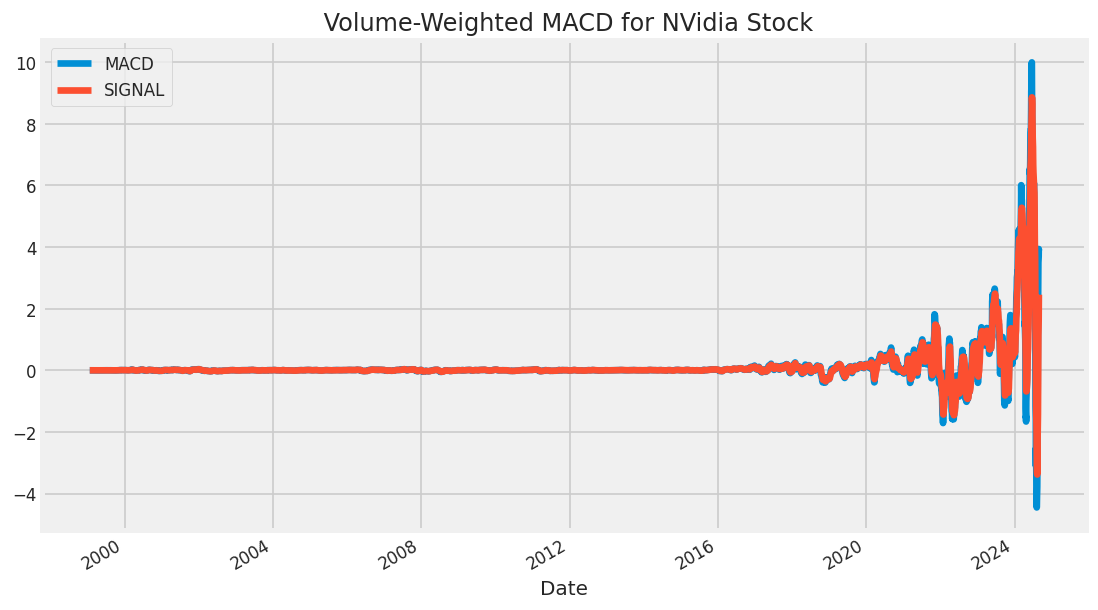

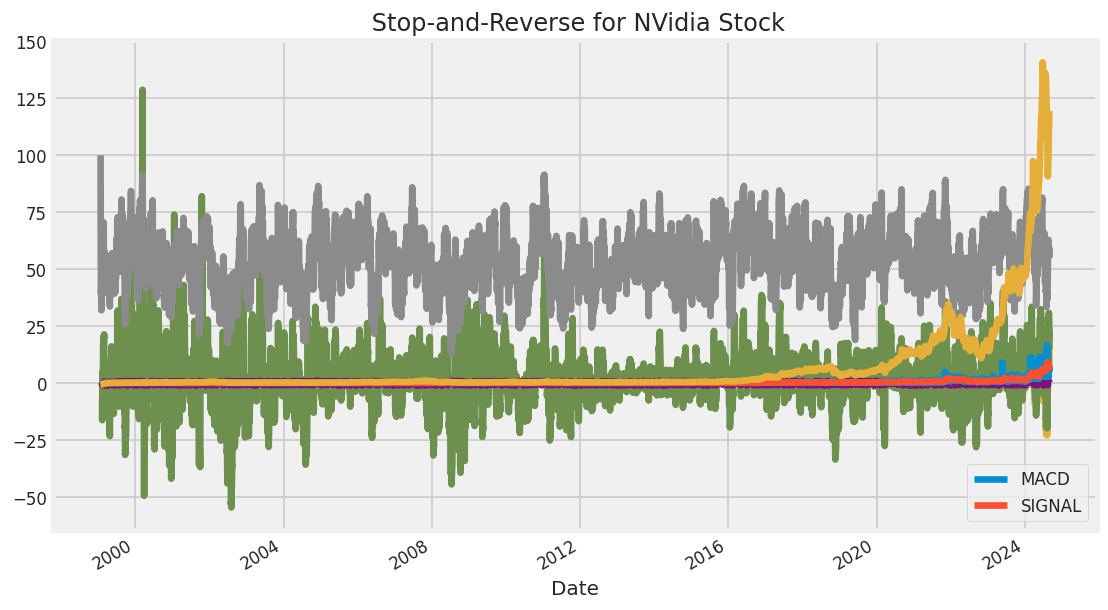

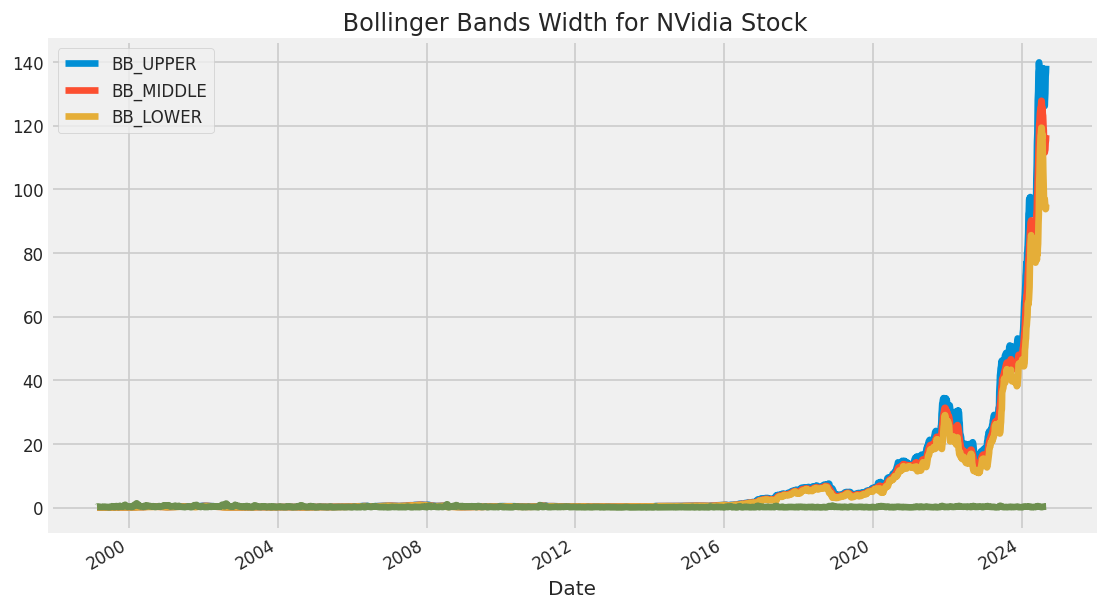

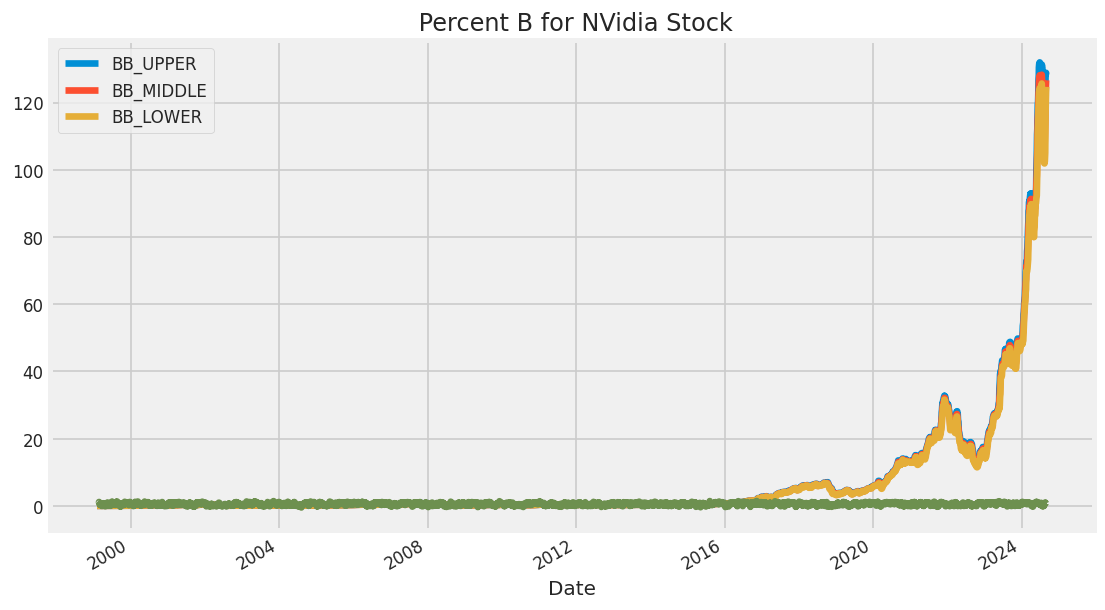

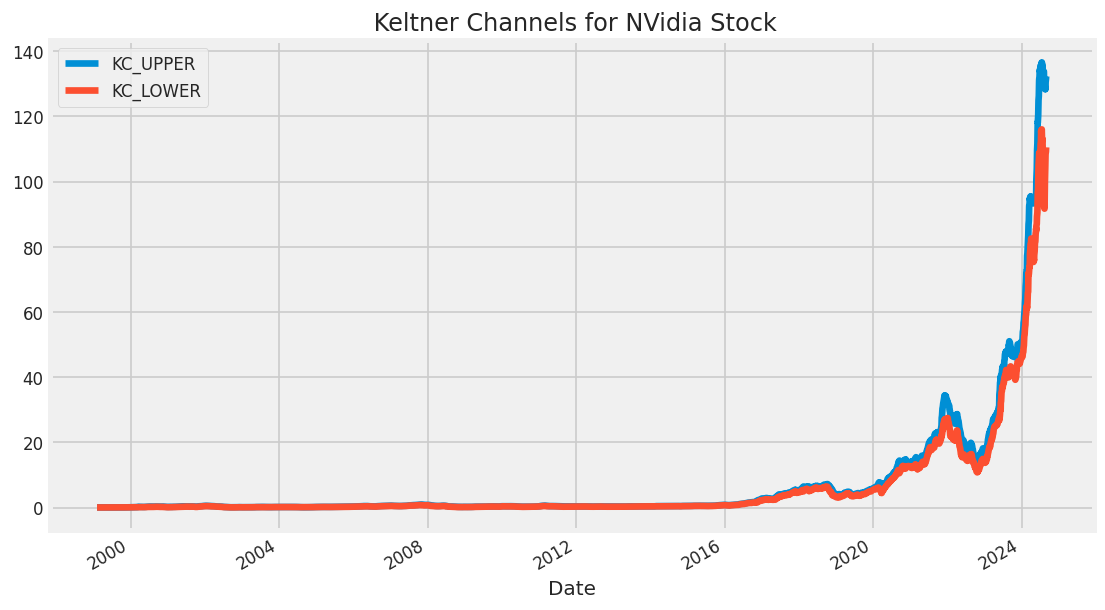

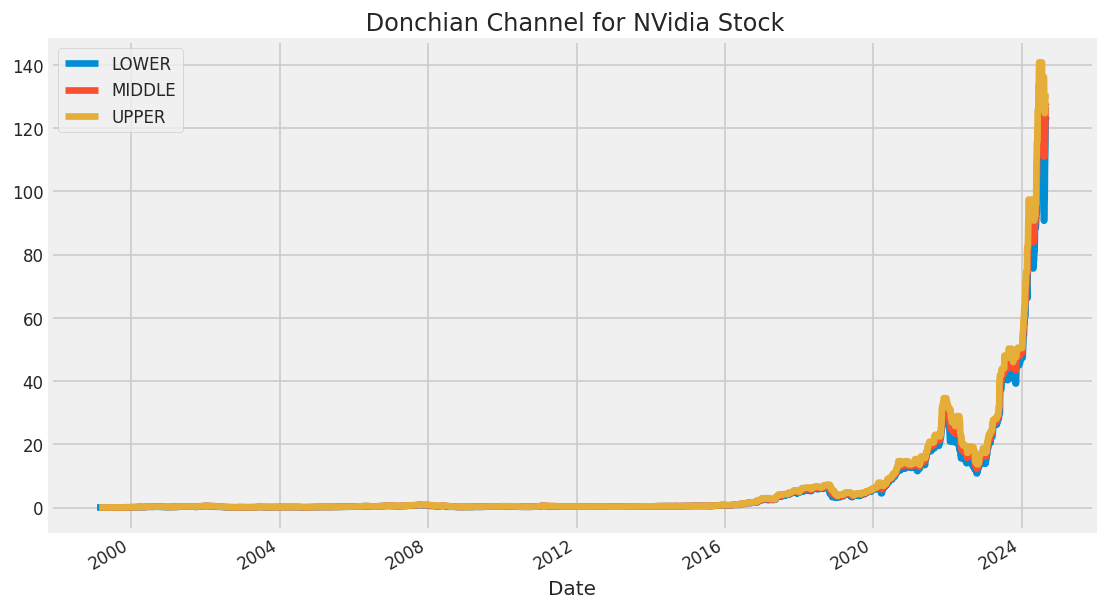

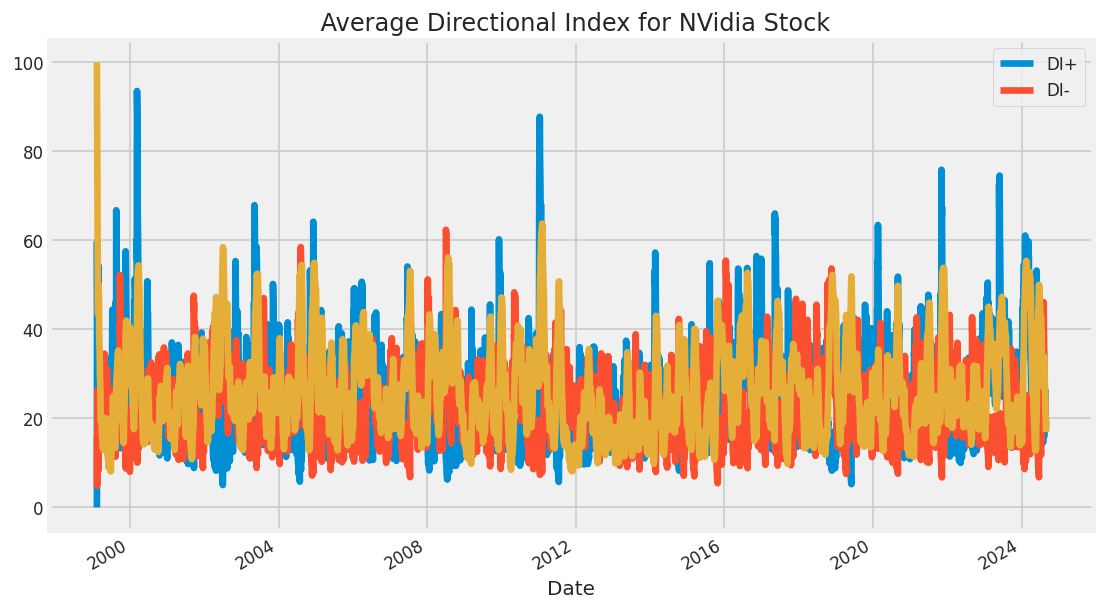

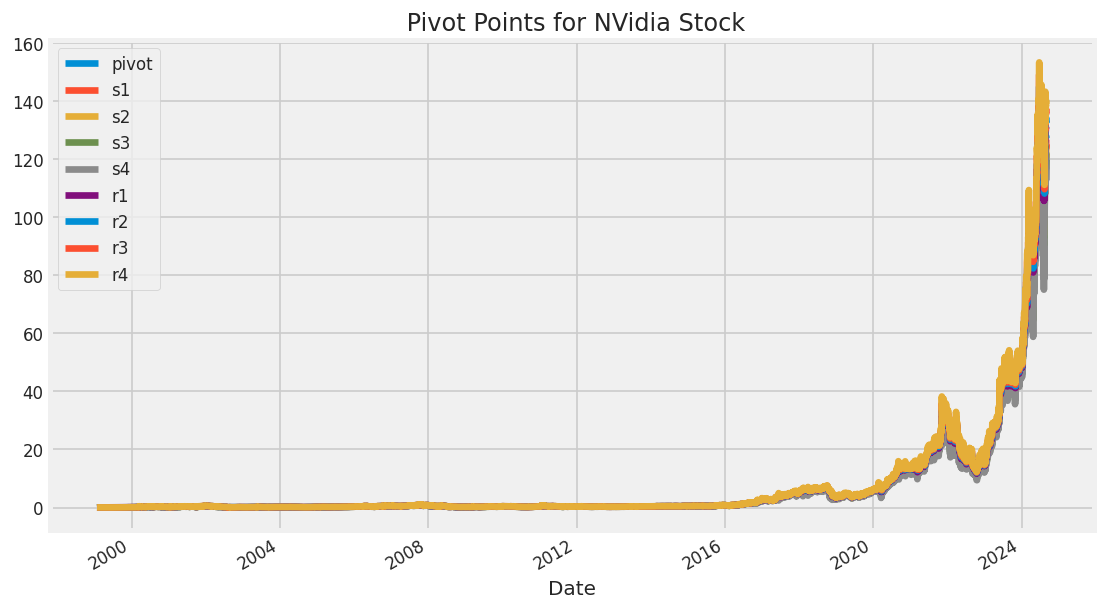

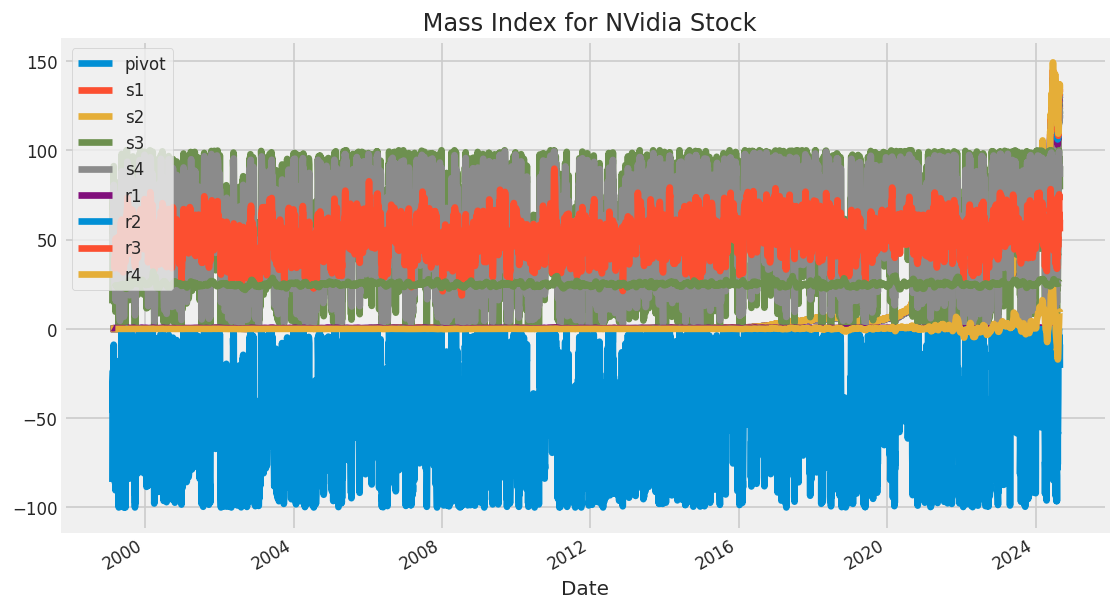

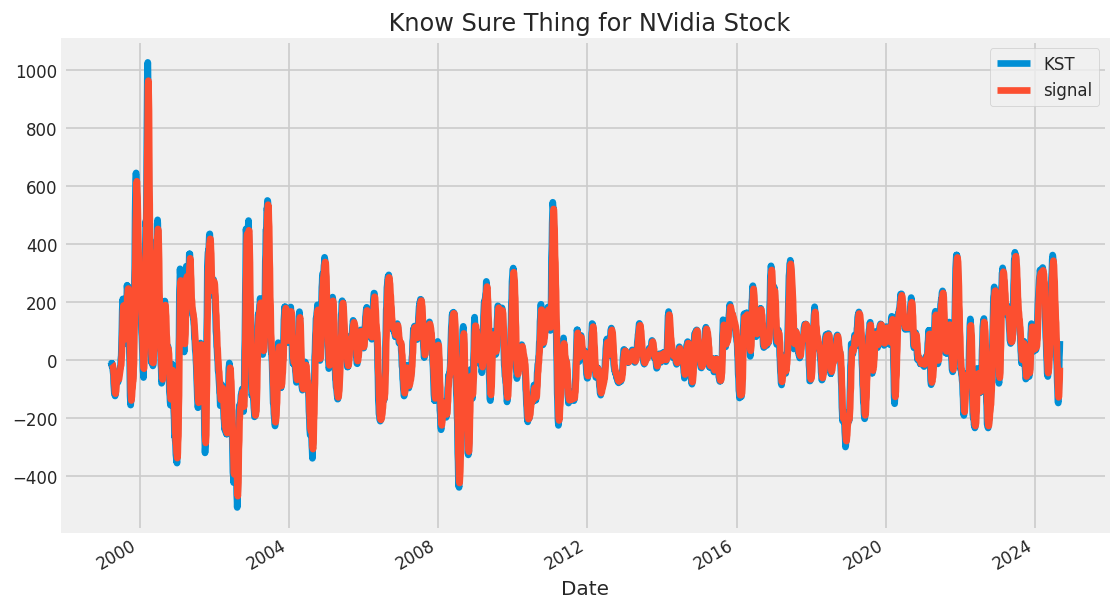

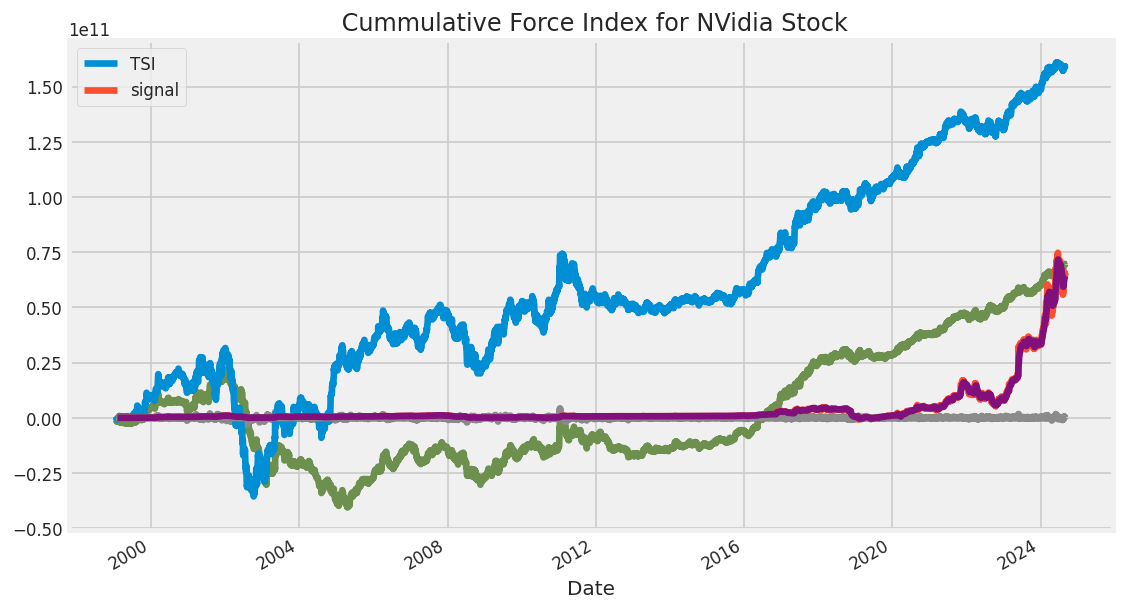

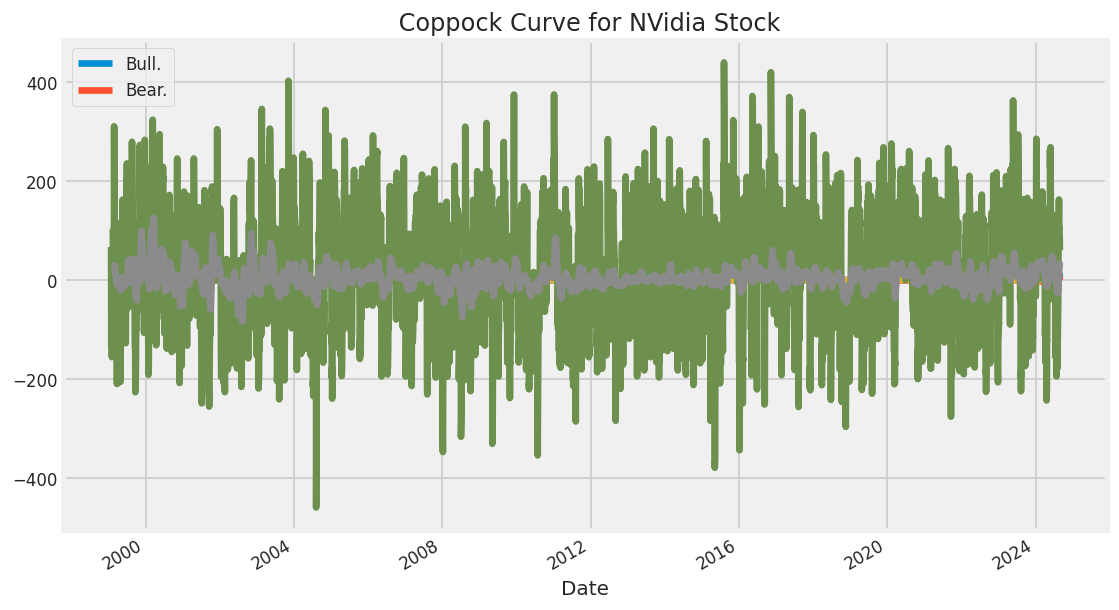

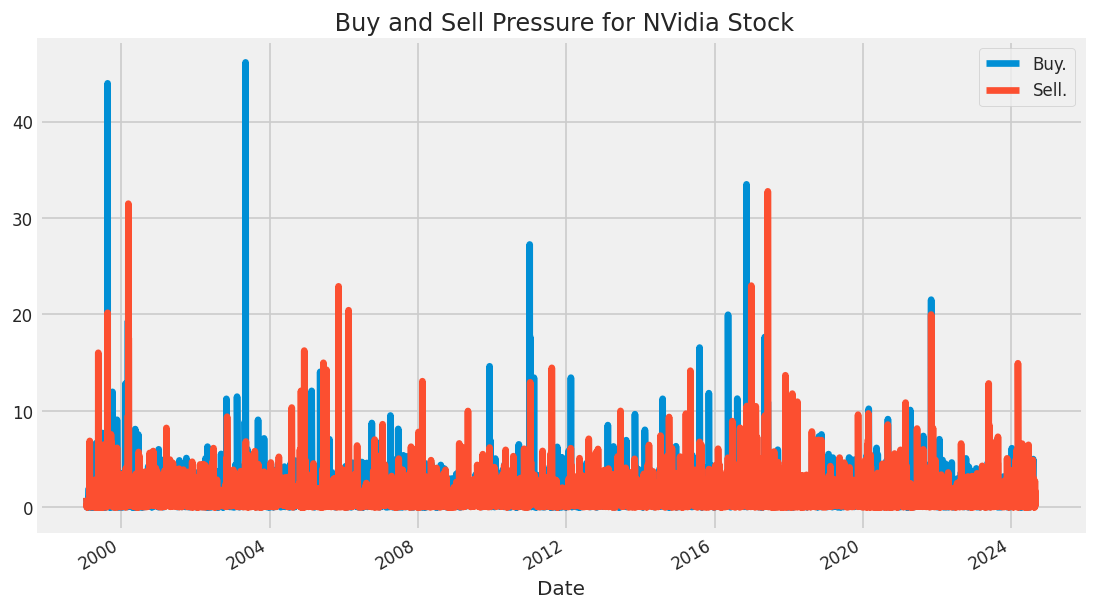

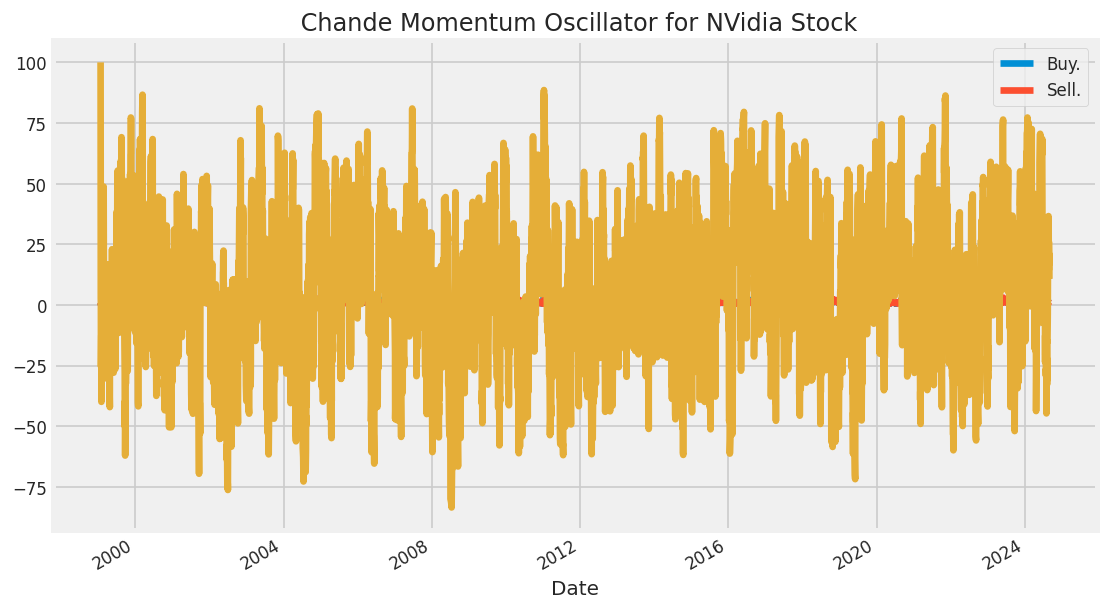

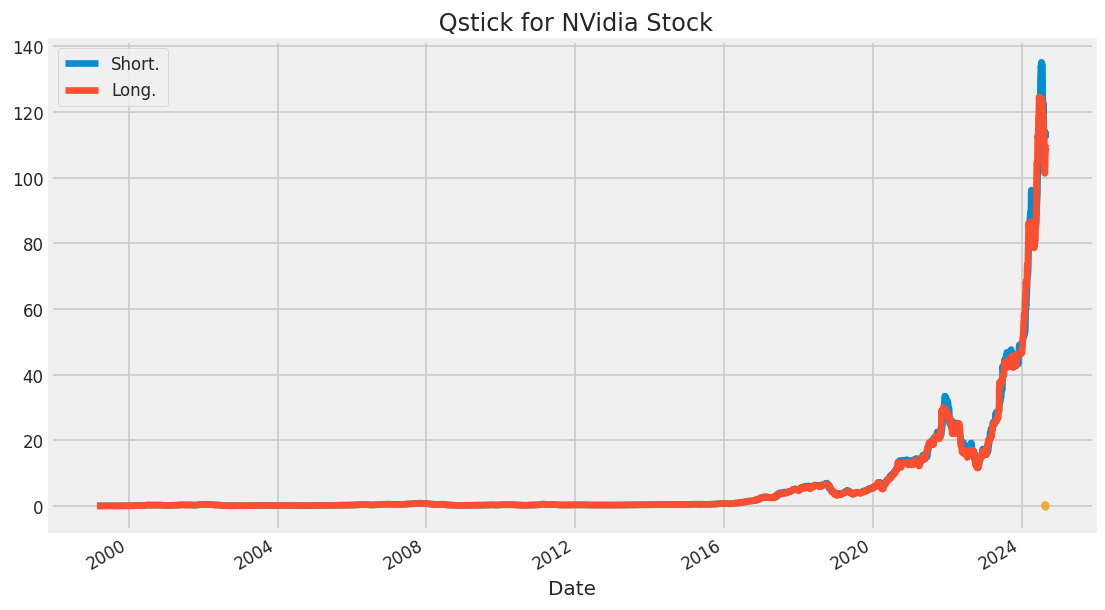

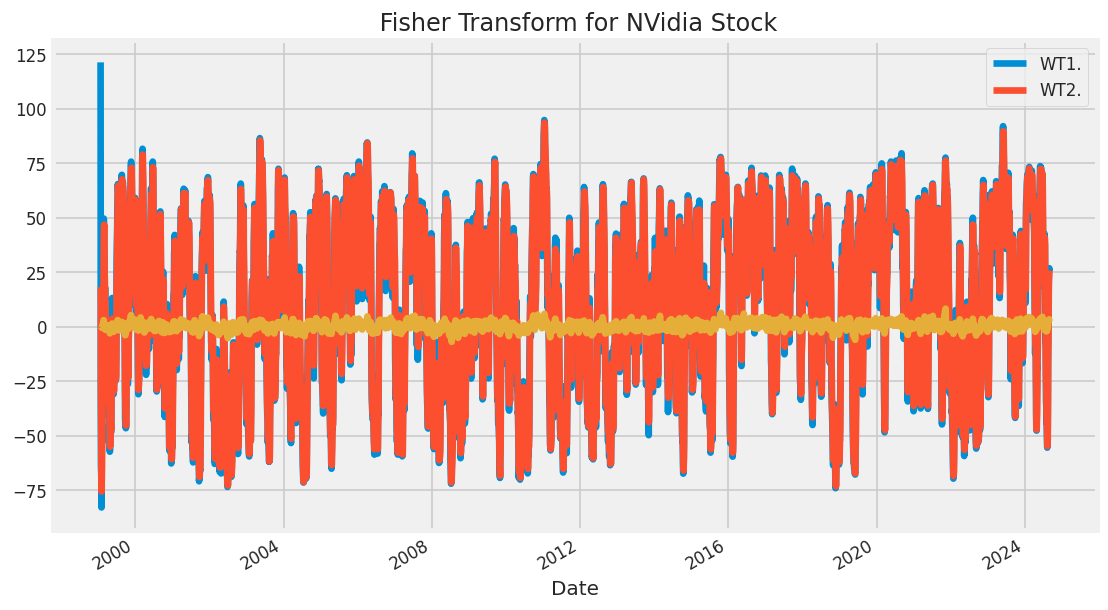

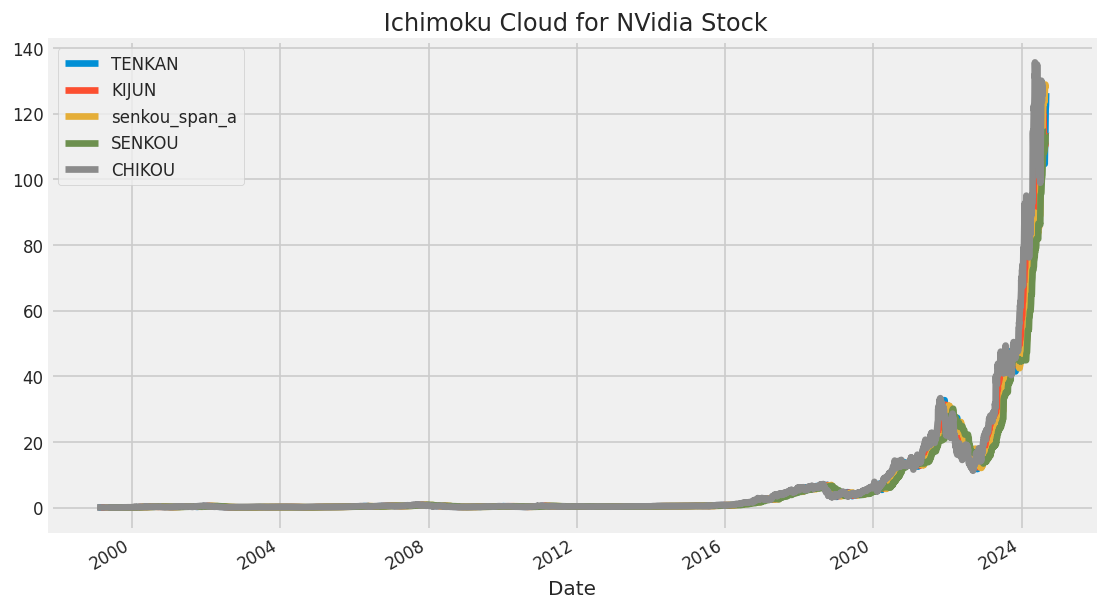

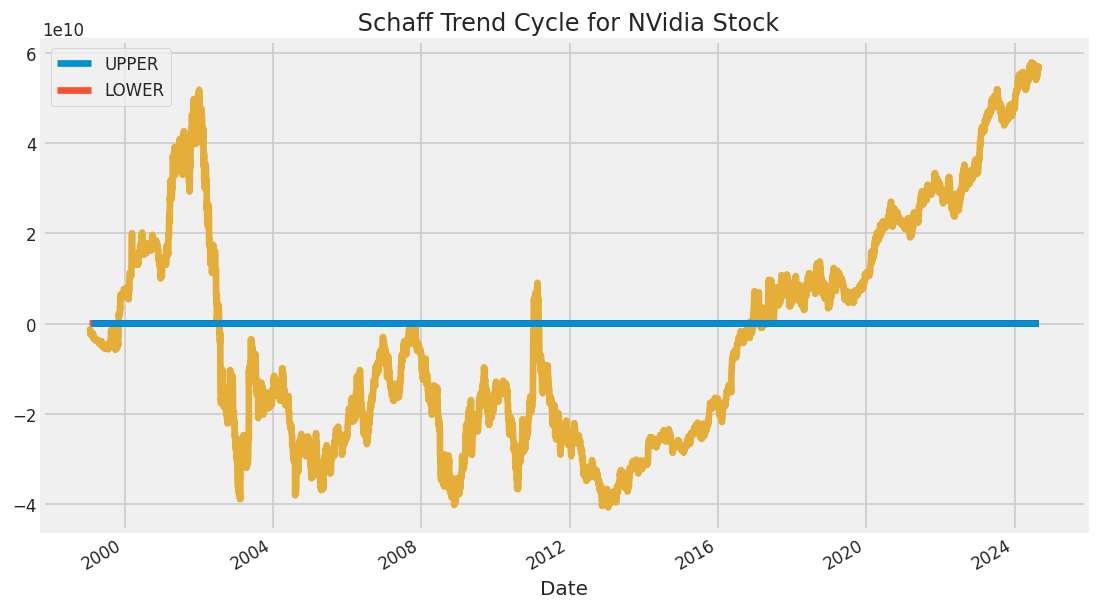

In [28]:
function_dict = {' Simple Moving Average ' : 'SMA',
                 ' Simple Moving Median ' : 'SMM',
                 ' Smoothed Simple Moving Average ' : 'SSMA',
                 ' Exponential Moving Average ' : 'EMA',
                 ' Double Exponential Moving Average ' : 'DEMA',
                 ' Triple Exponential Moving Average ' : 'TEMA',
                 ' Triangular Moving Average ' : 'TRIMA',
                 ' Triple Exponential Moving Average Oscillator ' : 'TRIX',
                 ' Volume Adjusted Moving Average ' : 'VAMA',
                 ' Kaufman Efficiency Indicator ' : 'ER',
                 ' Kaufmans Adaptive Moving Average ' : 'KAMA',
                 ' Zero Lag Exponential Moving Average ' : 'ZLEMA',
                 ' Weighted Moving Average ' : 'WMA',
                 ' Hull Moving Average ' : 'HMA',
                 ' Elastic Volume Moving Average ' : 'EVWMA',
                 ' Volume Weighted Average Price ' : 'VWAP',
                 ' Smoothed Moving Average ' : 'SMMA',
                 ' Fractal Adaptive Moving Average ' : 'FRAMA',
                 ' Moving Average Convergence Divergence ' : 'MACD',
                 ' Percentage Price Oscillator ' : 'PPO',
                 ' Volume-Weighted MACD ' : 'VW_MACD',
                 ' Elastic-Volume weighted MACD ' : 'EV_MACD',
                 ' Market Momentum ' : 'MOM',
                 ' Rate-of-Change ' : 'ROC',
                 ' Relative Strength Index ' : 'RSI',
                 ' Inverse Fisher Transform RSI ' : 'IFT_RSI',
                 ' True Range ' : 'TR',
                 ' Average True Range ' : 'ATR',
                 ' Stop-and-Reverse ' : 'SAR',
                 ' Bollinger Bands ' : 'BBANDS',
                 ' Bollinger Bands Width ' : 'BBWIDTH',
                 ' Momentum Breakout Bands ' : 'MOBO',
                 ' Percent B ' : 'PERCENT_B',
                 ' Keltner Channels ' : 'KC',
                 ' Donchian Channel ' : 'DO',
                 ' Directional Movement Indicator ' : 'DMI',
                 ' Average Directional Index ' : 'ADX',
                 ' Pivot Points ' : 'PIVOT',
                 ' Fibonacci Pivot Points ' : 'PIVOT_FIB',
                 ' Stochastic Oscillator Percent K ' : 'STOCH',
                 ' Stochastic oscillator Percent D ' : 'STOCHD',
                 ' Stochastic RSI ' : 'STOCHRSI',
                 ' Williams Percent R ' : 'WILLIAMS',
                 ' Ultimate Oscillator ' : 'UO',
                 ' Awesome Oscillator ' : 'AO',
                 ' Mass Index ' : 'MI',
                 #' Vortex Indicator ' : 'VORTEX',
                 ' Know Sure Thing ' : 'KST',
                 ' True Strength Index ' : 'TSI',
                 ' Typical Price ' : 'TP',
                 ' Accumulation-Distribution Line ' : 'ADL',
                 ' Chaikin Oscillator ' : 'CHAIKIN',
                 ' Money Flow Index ' : 'MFI',
                 ' On Balance Volume ' : 'OBV',
                 ' Weighter OBV ' : 'WOBV',
                 ' Volume Zone Oscillator ' : 'VZO',
                 ' Price Zone Oscillator ' : 'PZO',
                 ' Elders Force Index ' : 'EFI',
                 ' Cummulative Force Index ' : 'CFI',
                 ' Bull power and Bear Power ' : 'EBBP',
                 ' Ease of Movement ' : 'EMV',
                 ' Commodity Channel Index ' : 'CCI',
                 ' Coppock Curve ' : 'COPP',
                 ' Buy and Sell Pressure ' : 'BASP',
                 ' Normalized BASP ' : 'BASPN',
                 ' Chande Momentum Oscillator ' : 'CMO',
                 ' Chandelier Exit ' : 'CHANDELIER',
                 ' Qstick ' : 'QSTICK',
                 #' Twiggs Money Index ' : 'TMF',
                 ' Wave Trend Oscillator ' : 'WTO',
                 ' Fisher Transform ' : 'FISH',
                 ' Ichimoku Cloud ' : 'ICHIMOKU',
                 ' Adaptive Price Zone ' : 'APZ',
                 #' Squeeze Momentum Indicator ' : 'SQZMI',
                 ' Volume Price Trend ' : 'VPT',
                 ' Finite Volume Element ' : 'FVE',
                 ' Volume Flow Indicator ' : 'VFI',
                 ' Moving Standard deviation ' : 'MSD',
                 ' Schaff Trend Cycle ' : 'STC'}

for key, value in function_dict .items():
    function_name = "TA." + value + "(ohlc).plot(title='" + key + "for NVidia Stock')"
    result = eval(function_name)

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook"> 8 Back Testing Trading Strategy</span>

In [29]:
# Defining DEMA cross strategy
class DemaCross(Strategy):

    def init(self):

        self.ma1 = self.I(TA.DEMA, ohlc, 10)
        self.ma2 = self.I(TA.DEMA, ohlc, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()

## Let us do a bit of backtesting with a value of $100000 

In [30]:
ohlc.reset_index()
#ohlc['Date'] = ohlc['Date'].replace(tzinfo=None)

Date        Open        High         Low  \
0     1999-01-22 00:00:00-05:00    0.040129    0.044786    0.035590   
1     1999-01-25 00:00:00-05:00    0.040607    0.042039    0.037621   
2     1999-01-26 00:00:00-05:00    0.042039    0.042876    0.037740   
3     1999-01-27 00:00:00-05:00    0.038457    0.039412    0.036307   
4     1999-01-28 00:00:00-05:00    0.038218    0.038457    0.037859   
...                         ...         ...         ...         ...   
6437  2024-08-22 00:00:00-04:00  130.020004  130.750000  123.099998   
6438  2024-08-23 00:00:00-04:00  125.860001  129.600006  125.220001   
6439  2024-08-26 00:00:00-04:00  129.570007  131.259995  124.370003   
6440  2024-08-27 00:00:00-04:00  125.050003  129.199997  123.879997   
6441  2024-08-28 00:00:00-04:00  128.119995  128.330002  122.639999   

           Close      Volume  Dividends  Stock Splits  
0       0.037621  2714688000        0.0           0.0  
1       0.041562   510480000        0.0           0.0  
2       0.038337   343200000        0.0           0.0  
3       0.038218   244368000        0.0           0.0  
4       0.038098   227520000        0.0           0.0  
...          ...         ...        ...           ...  
6437  123.739998   376189100        0.0           0.0  
6438  129.369995   323230300        0.0           0.0  
6439  126.459999   331964700        0.0           0.0  
6440  128.300003   301726100        0.0           0.0  
6441  125.175003   241795982        0.0           0.0  

[6442 rows x 8 columns]

In [31]:
ohlc=ohlc.dropna()
bt = Backtest(ohlc, DemaCross,
              cash=100000, commission=0.00015, exclusive_orders=True)

## Back Testing Summary

In [32]:
#bt.run()

### As you can see, if you had invested <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">`$100K` in NVidia</SPAN> shares, you would have got <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">Fluctuating </SPAN> returns between 2000 and 2010 <span class="title-section w3-xxlarge" style="color:magenta" id="codebook"> and an increasing yield now in </SPAN> returns

## Use Zoom to see the performance of the stock

In [33]:
#bt.plot()

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">8.0.5 Back Testing using KNN </span>
## Try another strategy - K Nearest Neighbor

##### Reference from Backtesting Manual

##### Please note this is a simple implementation of the example and is no way close to a professional trading strategy. This is purely for showing an example

In [34]:
import numpy as np


def get_X(data):
    """Return model design matrix X"""
    return data.filter(like='X').values


def get_y(data):
    """Return dependent variable y"""
    y = data.Close.pct_change(48).shift(-48)  # Returns after roughly two days
    y[y.between(-.004, .004)] = 0             # Devalue returns smaller than 0.4%
    y[y > 0] = 1
    y[y < 0] = -1
    return y


def get_clean_Xy(df):
    """Return (X, y) cleaned of NaN values"""
    X = get_X(df)
    y = get_y(df).values
    isnan = np.isnan(y)
    X = X[~isnan]
    y = y[~isnan]
    return X, y

In [35]:
data=ohlc

from backtesting.test import SMA

def BBANDS(data, n_lookback, n_std):
    """Bollinger bands indicator"""
    hlc3 = (data.High + data.Low + data.Close) / 3
    mean, std = hlc3.rolling(n_lookback).mean(), hlc3.rolling(n_lookback).std()
    upper = mean + n_std*std
    lower = mean - n_std*std
    return upper, lower


close = data.Close.values
sma10 = SMA(data.Close, 10)
sma20 = SMA(data.Close, 20)
sma50 = SMA(data.Close, 50)
sma100 = SMA(data.Close, 100)
upper, lower = BBANDS(data, 20, 2)

# Design matrix / independent features:

# Price-derived features
data['X_SMA10'] = (close - sma10) / close
data['X_SMA20'] = (close - sma20) / close
data['X_SMA50'] = (close - sma50) / close
data['X_SMA100'] = (close - sma100) / close

data['X_DELTA_SMA10'] = (sma10 - sma20) / close
data['X_DELTA_SMA20'] = (sma20 - sma50) / close
data['X_DELTA_SMA50'] = (sma50 - sma100) / close

# Indicator features
data['X_MOM'] = data.Close.pct_change(periods=2)
data['X_BB_upper'] = (upper - close) / close
data['X_BB_lower'] = (lower - close) / close
data['X_BB_width'] = (upper - lower) / close
data['X_Sentiment'] = ~data.index.to_series().between('2017-09-27', '2017-12-14')

# Some datetime features for good measure
data['X_day'] = data.index.dayofweek
data['X_hour'] = data.index.hour

#data = data.apply(pd.to_numeric)
#data = data.dropna().astype(np.float64)
#data.fillna(method="ffill")
#data =data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

#data.replace([np.inf, -np.inf], 0.0, inplace=True)
#data = data.fillna(data.mean(), inplace=True)
data = data.dropna().astype(np.float64)


import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X, y = get_clean_Xy(data)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

clf = KNeighborsClassifier(7)  # Model the output based on 7 "nearest" examples
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

_ = pd.DataFrame({'y_true': y_test, 'y_pred': y_pred}).plot(figsize=(15, 2), alpha=.7)
print('Classification accuracy: ', np.mean(y_test == y_pred))

%%time

from backtesting import Backtest, Strategy

N_TRAIN = 400


class MLTrainOnceStrategy(Strategy):
    price_delta = .004  # 0.4%

    def init(self):        
        # Init our model, a kNN classifier
        self.clf = KNeighborsClassifier(7)

        # Train the classifier in advance on the first N_TRAIN examples
        df = self.data.df.iloc[:N_TRAIN]
        X, y = get_clean_Xy(df)
        self.clf.fit(X, y)

        # Plot y for inspection
        self.I(get_y, self.data.df, name='y_true')

        # Prepare empty, all-NaN forecast indicator
        self.forecasts = self.I(lambda: np.repeat(np.nan, len(self.data)), name='forecast')

    def next(self):
        # Skip the training, in-sample data
        if len(self.data) < N_TRAIN:
            return

        # Proceed only with out-of-sample data. Prepare some variables
        high, low, close = self.data.High, self.data.Low, self.data.Close
        current_time = self.data.index[-1]

        # Forecast the next movement
        X = get_X(self.data.df.iloc[-1:])
        forecast = self.clf.predict(X)[0]

        # Update the plotted "forecast" indicator
        self.forecasts[-1] = forecast

        # If our forecast is upwards and we don't already hold a long position
        # place a long order for 20% of available account equity. Vice versa for short.
        # Also set target take-profit and stop-loss prices to be one price_delta
        # away from the current closing price.
        upper, lower = close[-1] * (1 + np.r_[1, -1]*self.price_delta)

        if forecast == 1 and not self.position.is_long:
            self.buy(size=.2, tp=upper, sl=lower)
        elif forecast == -1 and not self.position.is_short:
            self.sell(size=.2, tp=lower, sl=upper)

        # Additionally, set aggressive stop-loss on trades that have been open 
        # for more than two days
        for trade in self.trades:
            if current_time - trade.entry_time > pd.Timedelta('2 days'):
                if trade.is_long:
                    trade.sl = max(trade.sl, low)
                else:
                    trade.sl = min(trade.sl, high)


bt = Backtest(data, MLTrainOnceStrategy, commission=.0002, margin=.05)
bt.run()

bt.plot()

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">8.1 Back Testing Trading Strategy Using KNN</span>

from backtesting import Strategy
from backtesting.lib import crossover


class Sma4Cross(Strategy):
    n1 = 50
    n2 = 100
    n_enter = 20
    n_exit = 10
    
    def init(self):
        self.sma1 = self.I(SMA, self.data.Close, self.n1)
        self.sma2 = self.I(SMA, self.data.Close, self.n2)
        self.sNVDA_enter = self.I(SMA, self.data.Close, self.n_enter)
        self.sNVDA_exit = self.I(SMA, self.data.Close, self.n_exit)
        
    def next(self):
        
        if not self.position:
            
            # On upwards trend, if price closes above
            # "entry" MA, go long
            
            # Here, even though the operands are arrays, this
            # works by implicitly comparing the two last values
            if self.sma1 > self.sma2:
                if crossover(self.data.Close, self.sNVDA_enter):
                    self.buy()
                    
            # On downwards trend, if price closes below
            # "entry" MA, go short
            
            else:
                if crossover(self.sNVDA_enter, self.data.Close):
                    self.sell()
        
        # But if we already hold a position and the price
        # closes back below (above) "exit" MA, close the position
        
        else:
            if (self.position.is_long and
                crossover(self.sNVDA_exit, self.data.Close)
                or
                self.position.is_short and
                crossover(self.data.Close, self.sNVDA_exit)):
                
                self.position.close()

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">8.2 BackTesting Trading Strategy Heatmaps</span>

%%time 

from backtesting import Backtest
from backtesting.test import GOOG


backtest = Backtest(ohlc, Sma4Cross, commission=.002)

stats, heatmap = backtest.optimize(
    n1=range(10, 110, 10),
    n2=range(20, 210, 20),
    n_enter=range(15, 35, 5),
    n_exit=range(10, 25, 5),
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    max_tries=200,
    random_state=0,
    return_heatmap=True)

heatmap

hm = heatmap.groupby(['n1', 'n2']).mean().unstack()
hm

from backtesting.lib import plot_heatmaps


plot_heatmaps(heatmap, agg='mean')

%%capture

!pip install scikit-optimize  # This is a run-time dependency

%%time

stats_skopt, heatmap, optimize_result = backtest.optimize(
    n1=[10, 100],      # Note: For method="skopt", we
    n2=[20, 200],      # only need interval end-points
    n_enter=[10, 40],
    n_exit=[10, 30],
    constraint=lambda p: p.n_exit < p.n_enter < p.n1 < p.n2,
    maximize='Equity Final [$]',
    method='skopt',
    max_tries=200,
    random_state=0,
    return_heatmap=True,
    return_optimization=True)

from skopt.plots import plot_objective

_ = plot_objective(optimize_result, n_points=10)

from skopt.plots import plot_evaluations

_ = plot_evaluations(optimize_result, bins=10)

# <span class="title-section w3-xxlarge" style="color:magenta" id="codebook">Work In Progress. More to come</span>